944 3397
yes
Joint point at (1871, 4385) pixel
Joint point at (6.236666666666666, 1.9233333333333331) inches
(1871, 4385)
944 3397
yes
Joint point at (1872, 4385) pixel
Joint point at (6.239999999999999, 1.9233333333333331) inches
1249 3397
yes
Joint point at (1757, 4188) pixel
Joint point at (5.8566666666666665, 2.5799999999999996) inches
(1757, 4188)
1249 3397
yes
Joint point at (1758, 4188) pixel
Joint point at (5.859999999999999, 2.5799999999999996) inches
762 3515
yes
Joint point at (2017, 4246) pixel
Joint point at (6.723333333333333, 2.3866666666666667) inches
(2017, 4246)
762 3515
yes
Joint point at (2018, 4246) pixel
Joint point at (6.726666666666667, 2.3866666666666667) inches
768 3580
yes
Joint point at (1997, 4054) pixel
Joint point at (6.656666666666666, 3.0266666666666664) inches
(1997, 4054)
768 3580
yes
Joint point at (1998, 4054) pixel
Joint point at (6.659999999999999, 3.0266666666666664) inches
965 3397
yes
Joint point at (1963, 4142) pixel
Joint point at (6.54333333

/tmp/ipykernel_4803/2246798380.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


762 4198
yes
Joint point at (1941, 4301) pixel
Joint point at (6.47, 2.203333333333333) inches
935 3397
yes
Joint point at (2127, 4219) pixel
Joint point at (7.09, 2.4766666666666666) inches
(2127, 4219)
935 3397
yes
Joint point at (2128, 4219) pixel
Joint point at (7.093333333333333, 2.4766666666666666) inches
971 3397
yes
Joint point at (1982, 3898) pixel
Joint point at (6.6066666666666665, 3.5466666666666664) inches
(1982, 3898)
971 3397
yes
Joint point at (1983, 3898) pixel
Joint point at (6.609999999999999, 3.5466666666666664) inches
945 3397
yes
Joint point at (1731, 4387) pixel
Joint point at (5.77, 1.9166666666666665) inches
(1731, 4387)
945 3397
yes
Joint point at (1732, 4387) pixel
Joint point at (5.7733333333333325, 1.9166666666666665) inches
971 3397
yes
Joint point at (2052, 4059) pixel
Joint point at (6.84, 3.01) inches
(2052, 4059)
971 3397
yes
Joint point at (2053, 4059) pixel
Joint point at (6.843333333333333, 3.01) inches
1157 3414
yes
Joint point at (1967, 3582) pixe

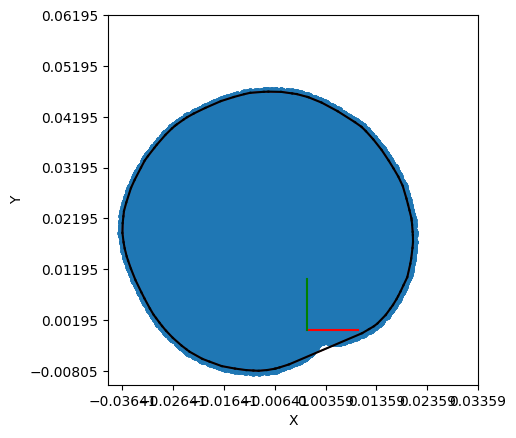

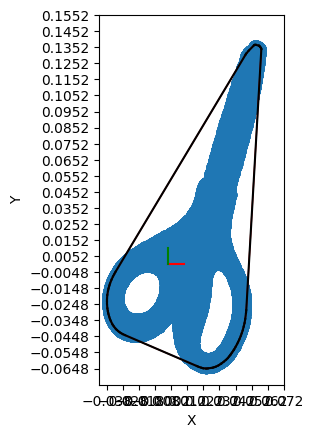

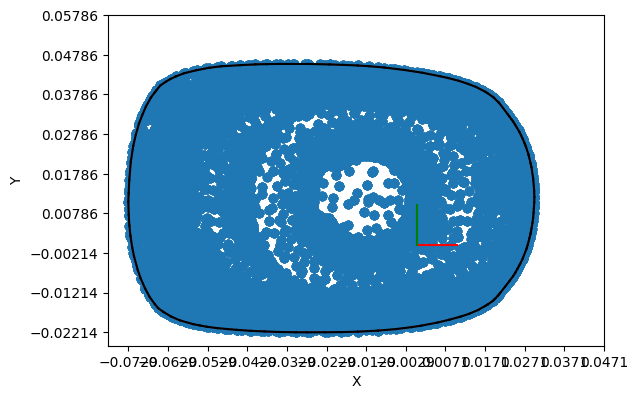

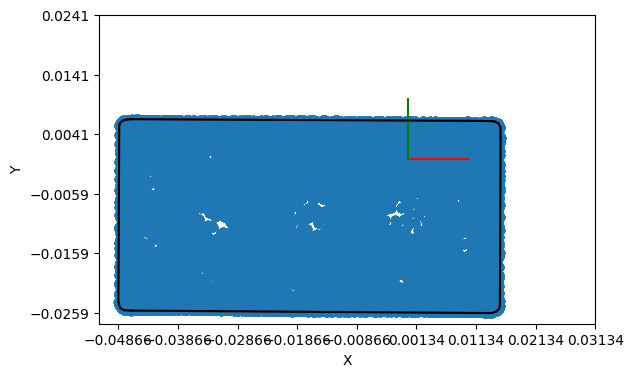

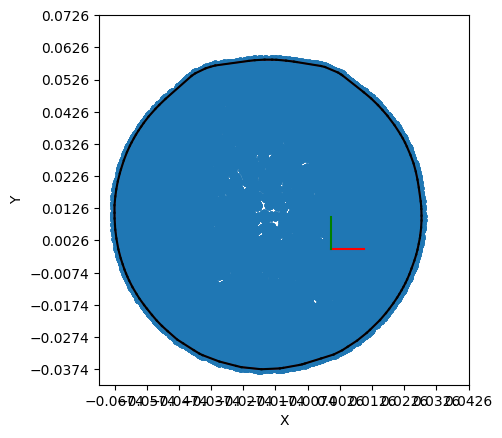

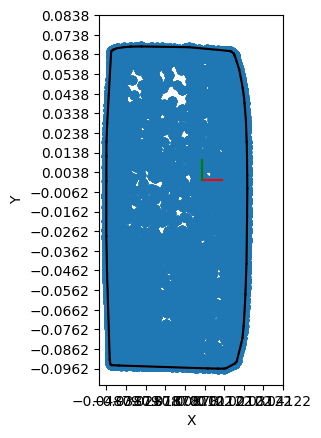

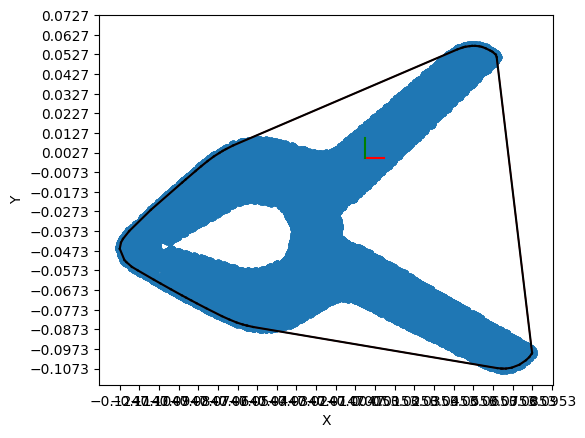

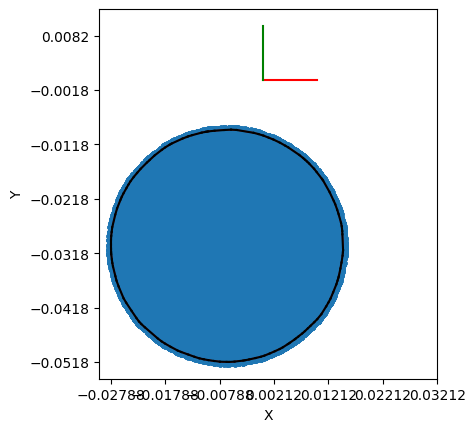

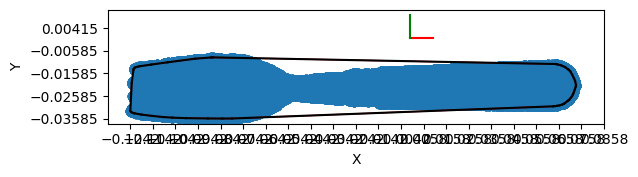

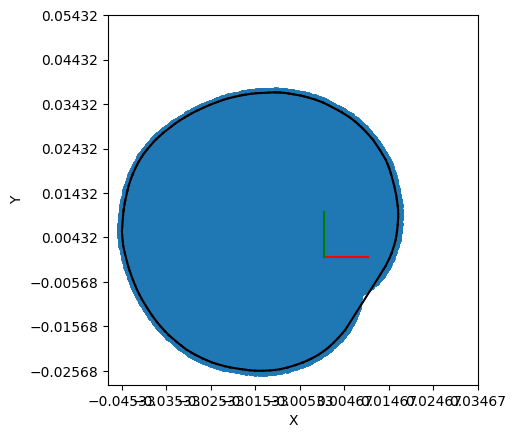

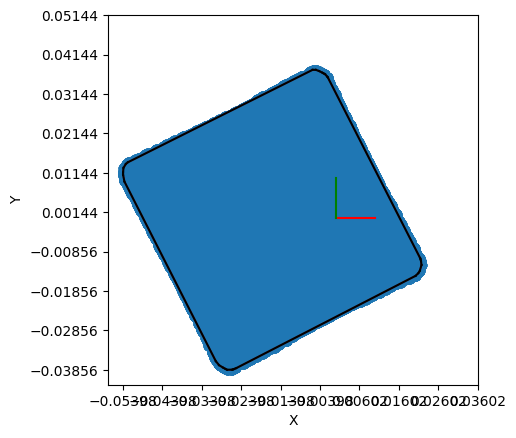

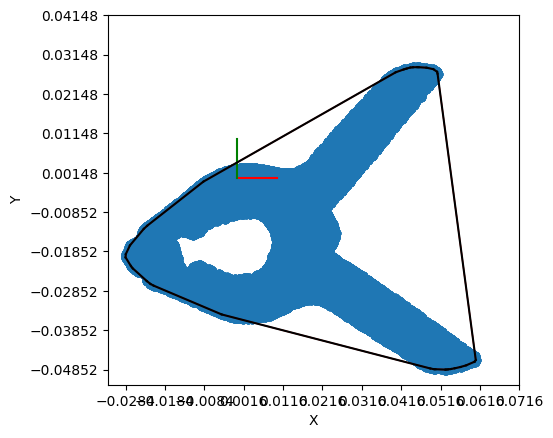

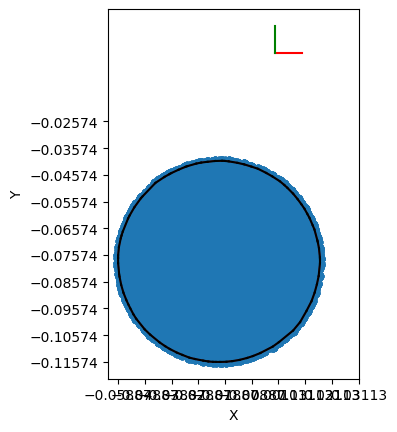

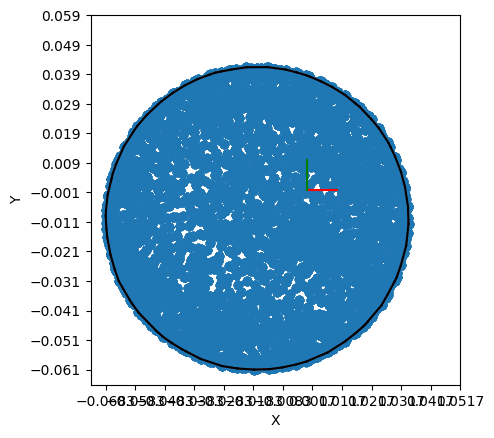

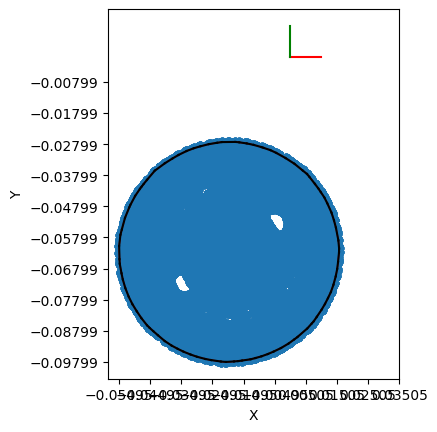

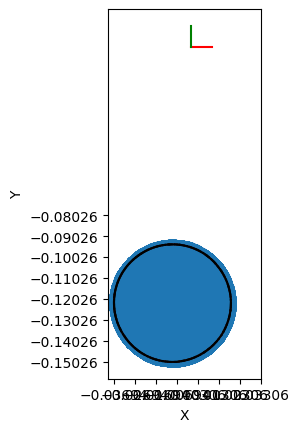

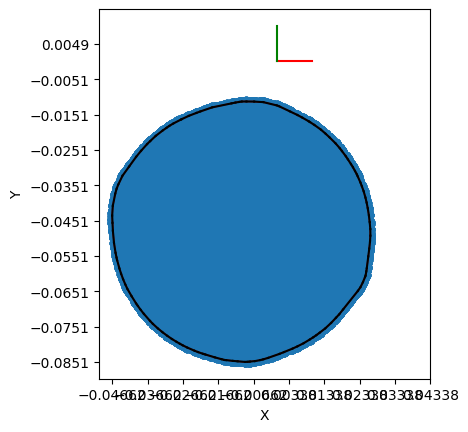

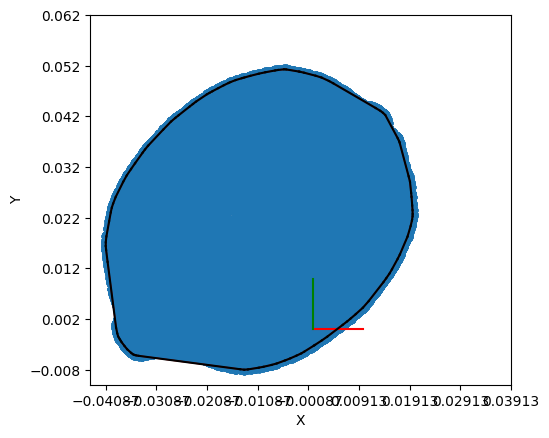

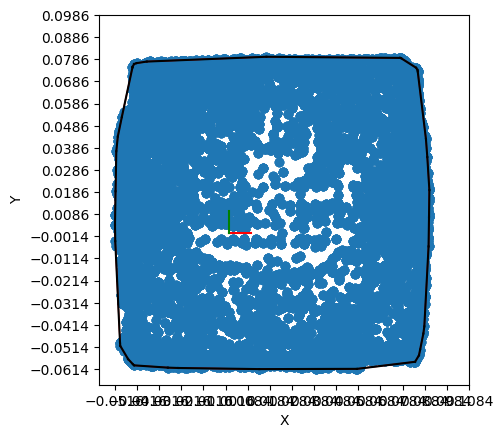

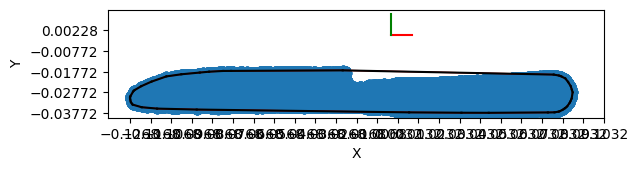

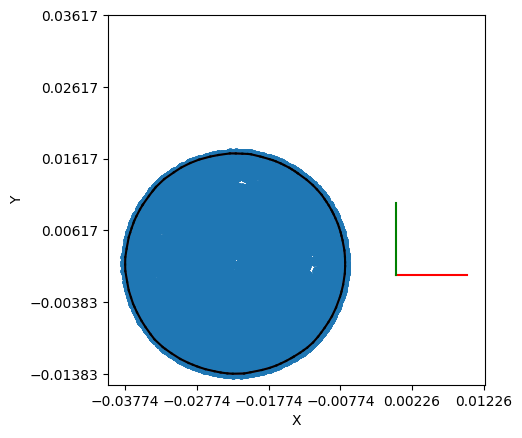

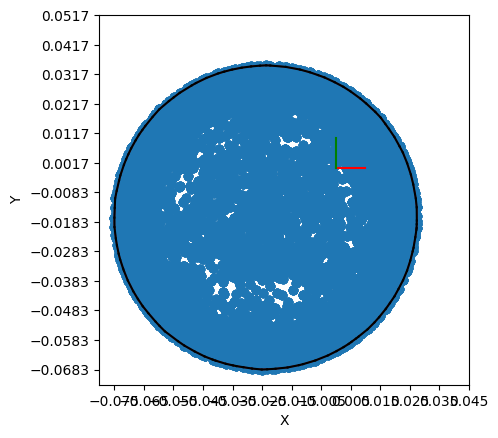

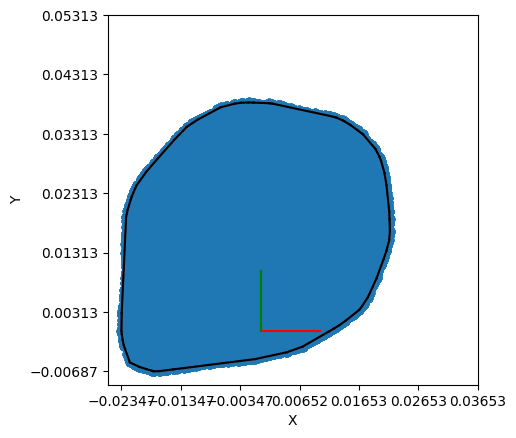

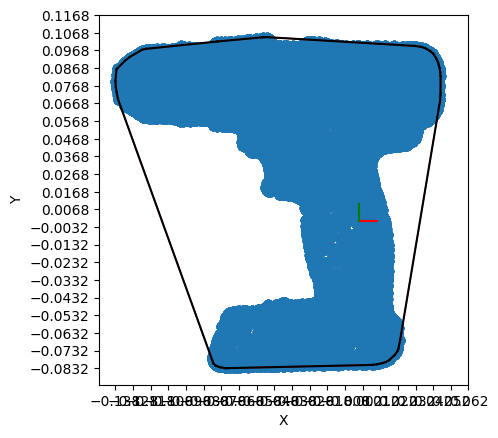

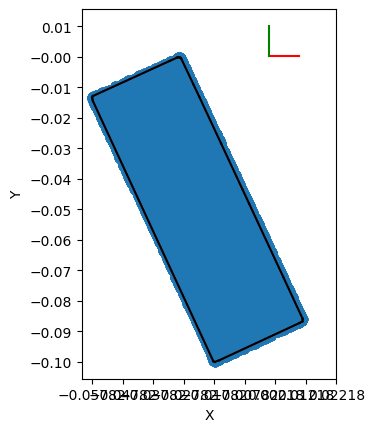

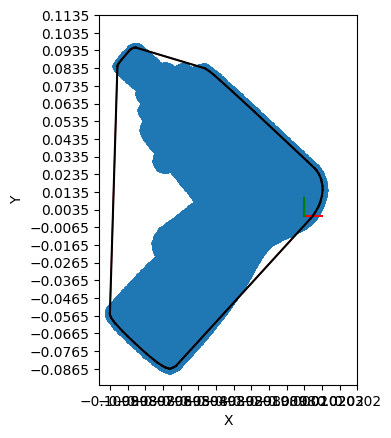

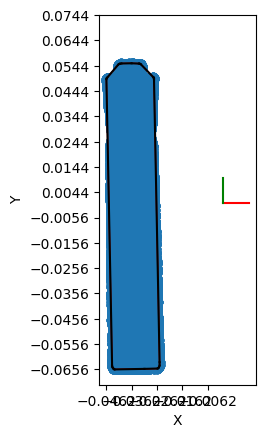

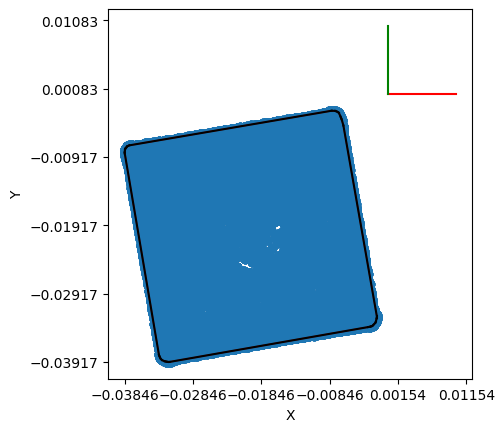

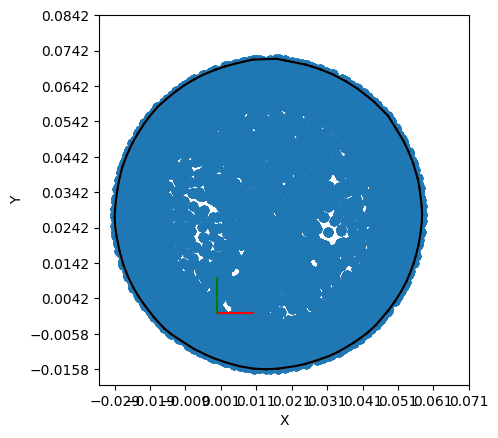

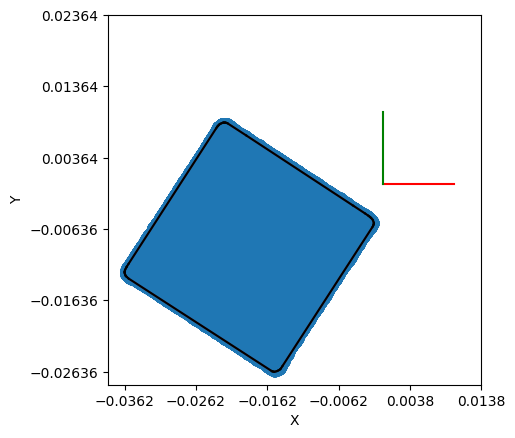

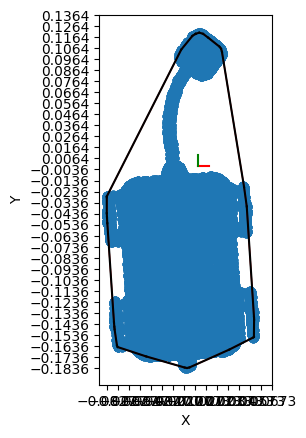

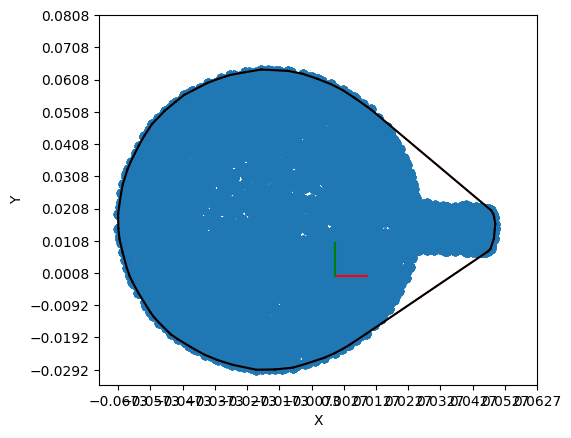

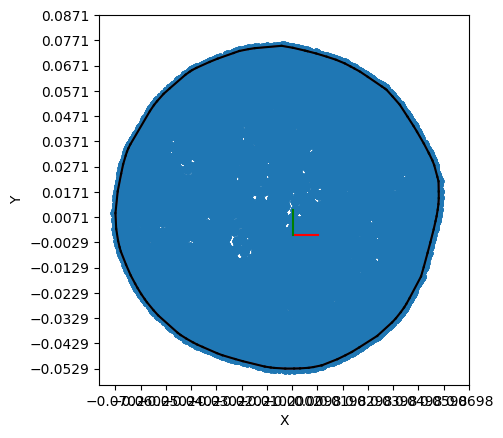

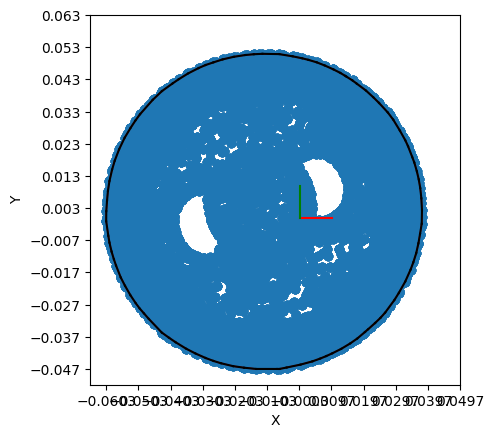

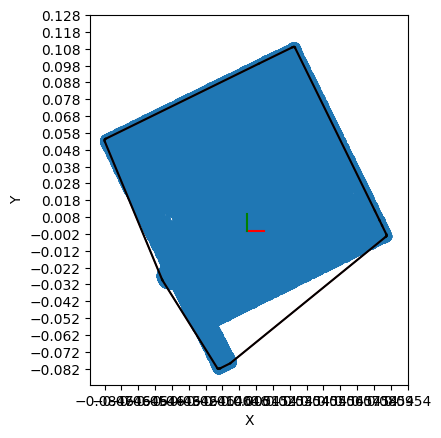

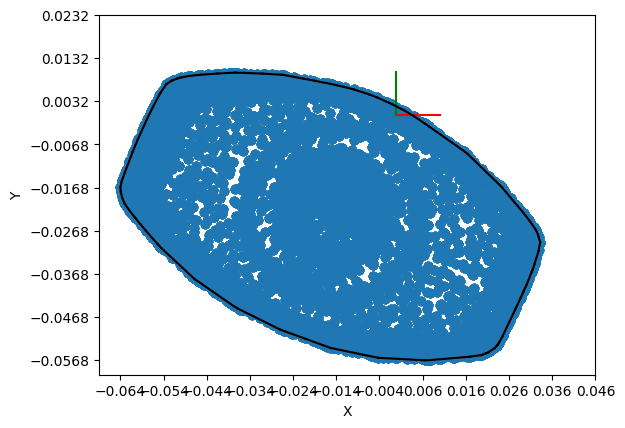

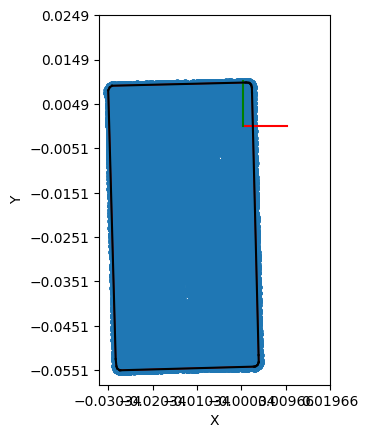

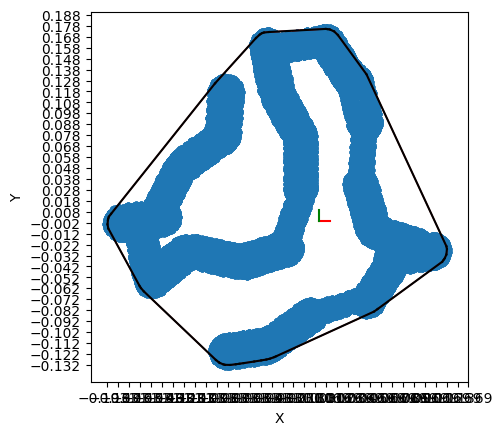

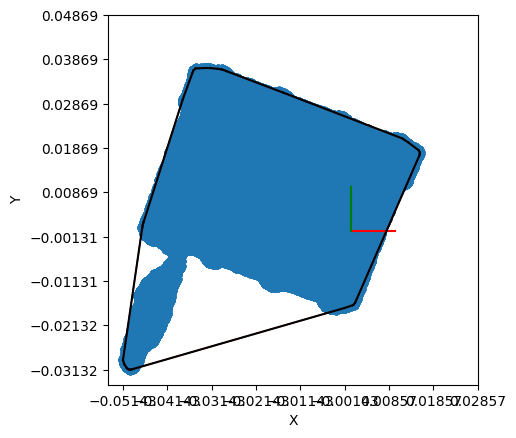

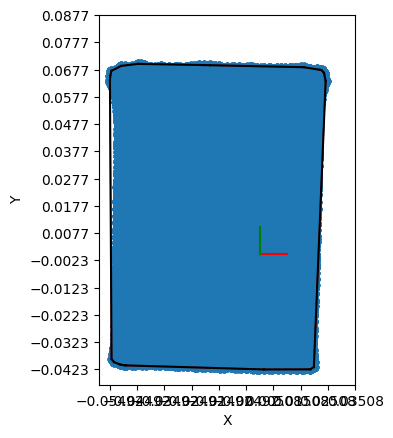

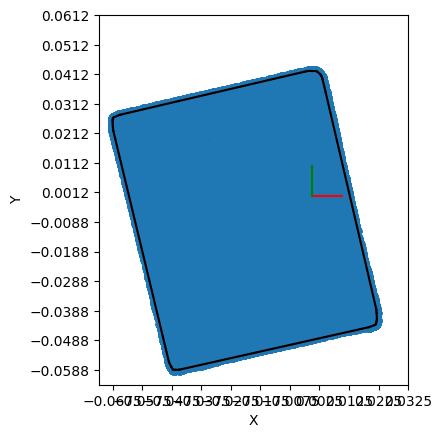

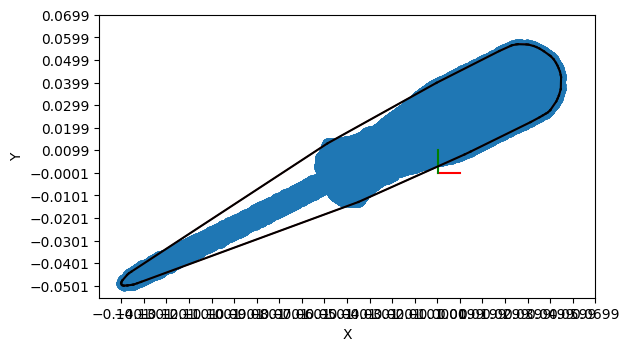

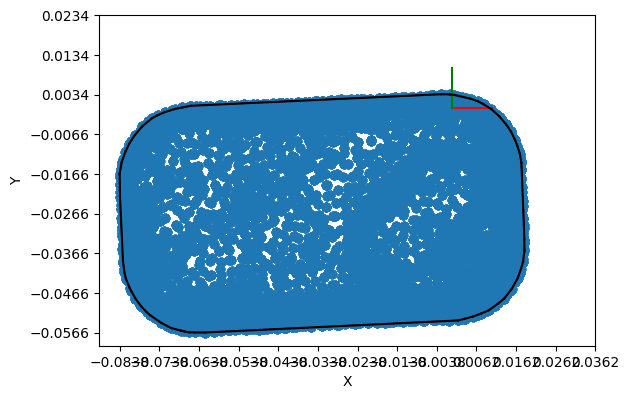

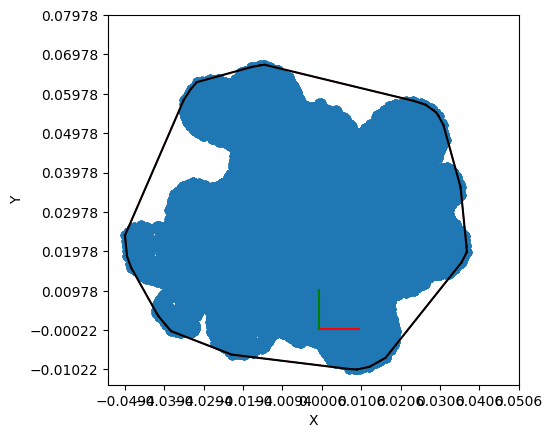

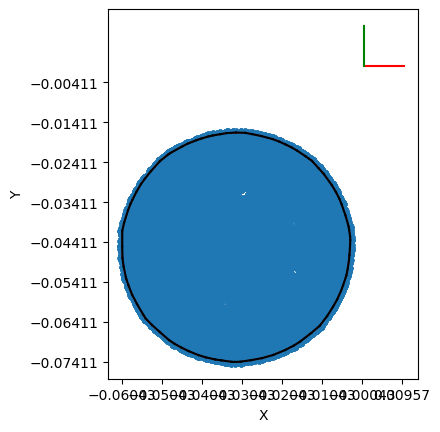

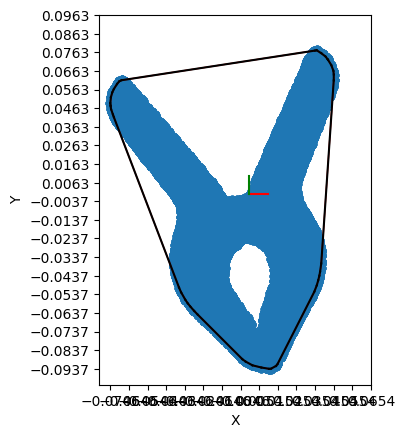

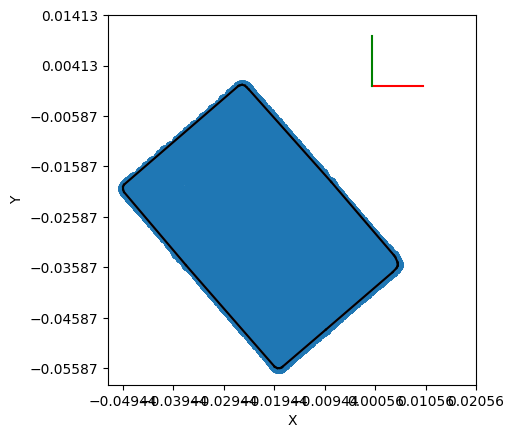

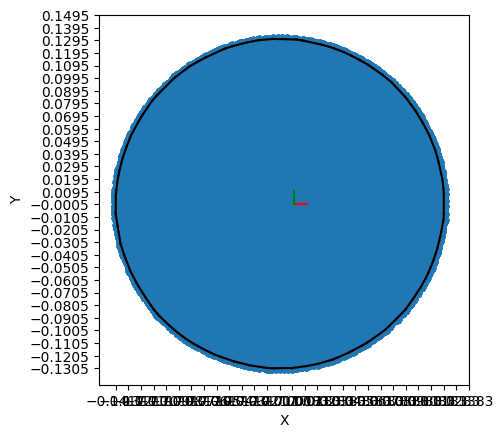

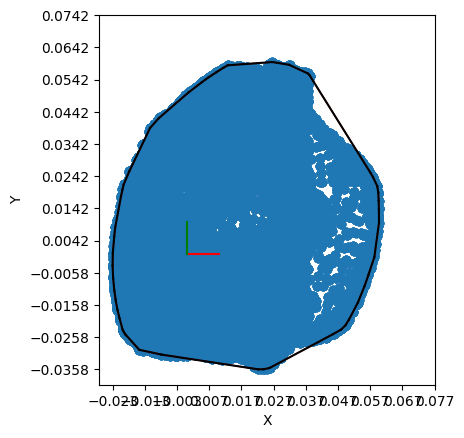

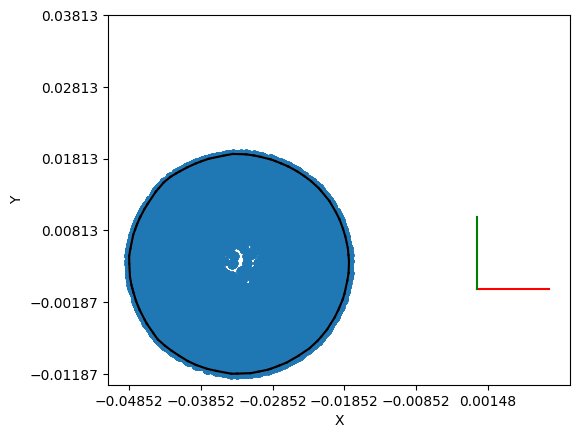

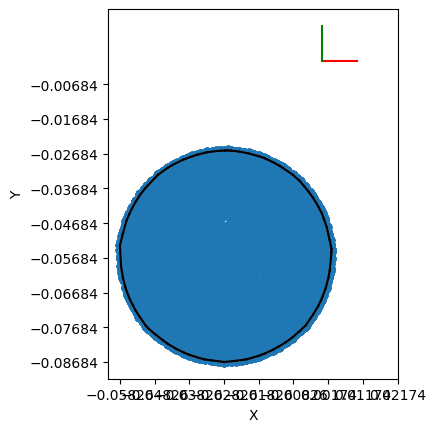

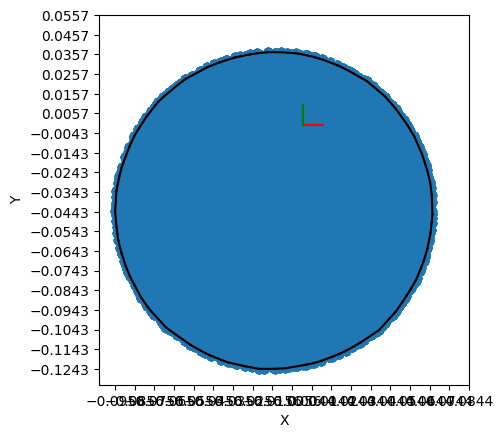

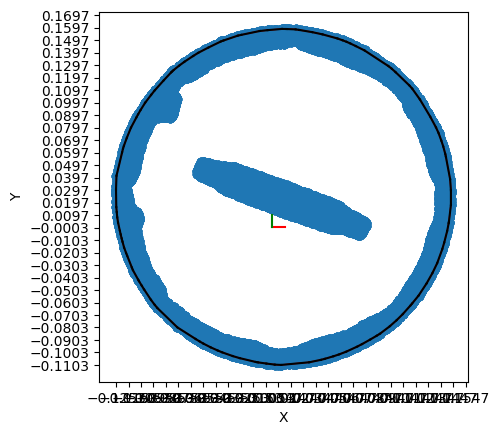

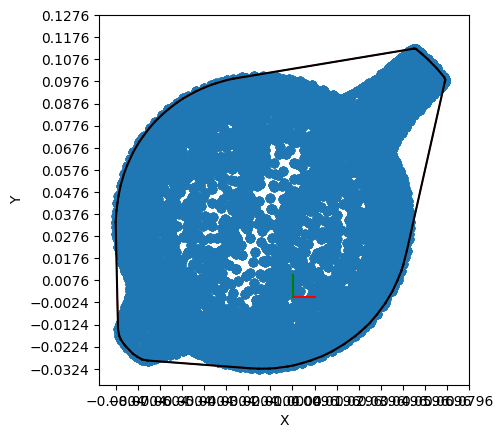

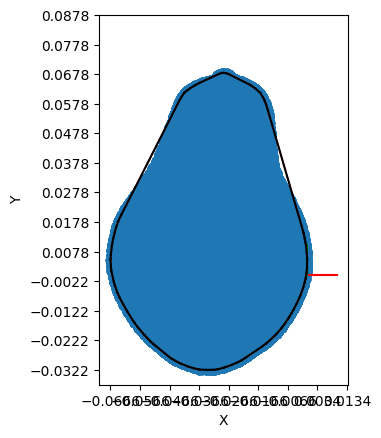

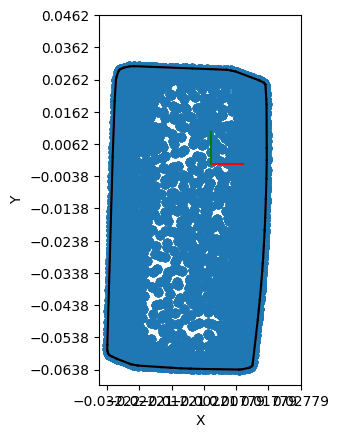

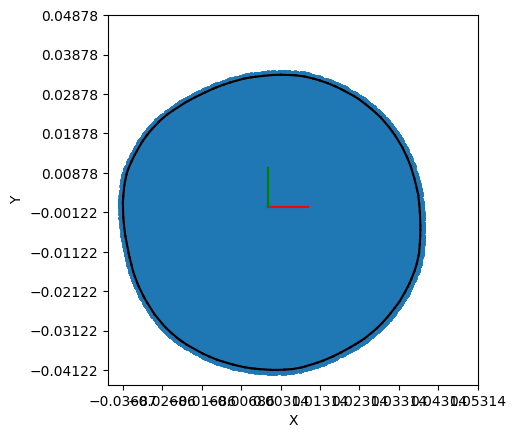

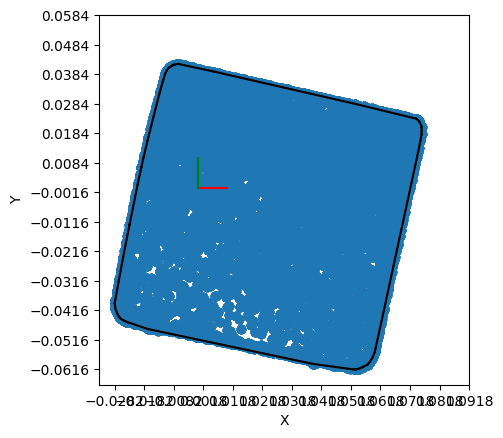

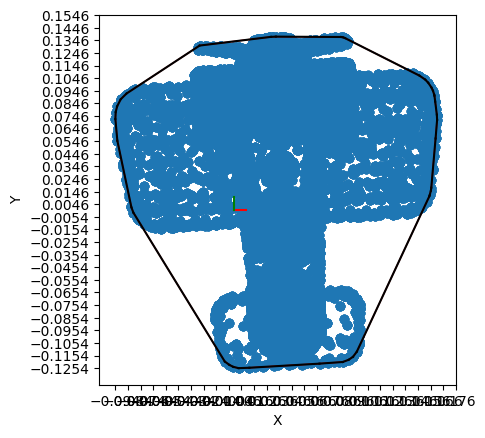

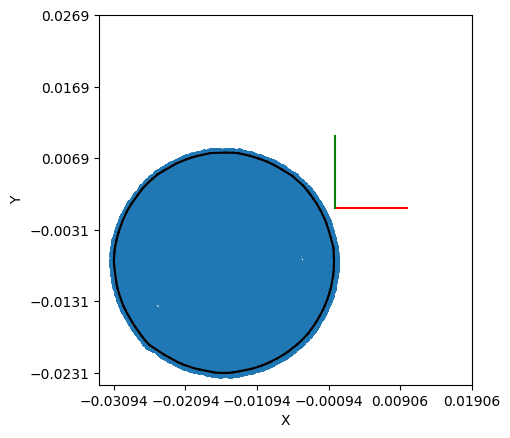

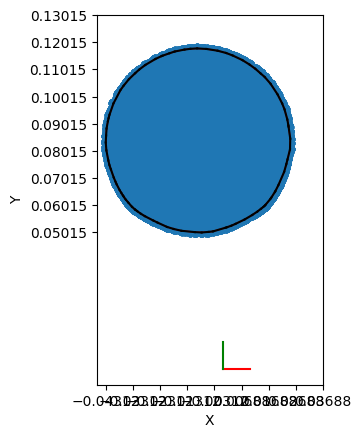

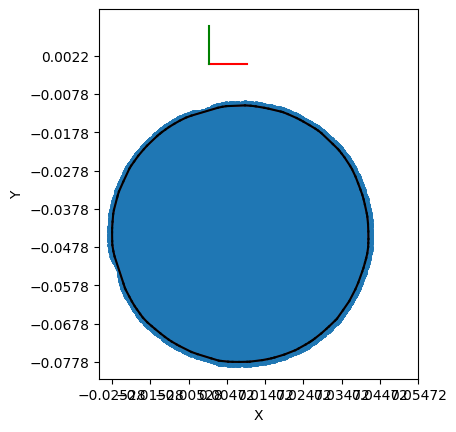

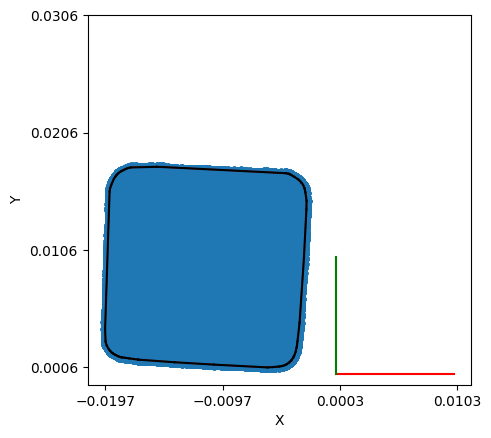

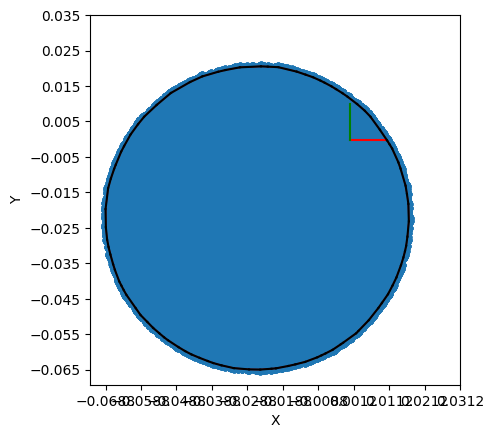

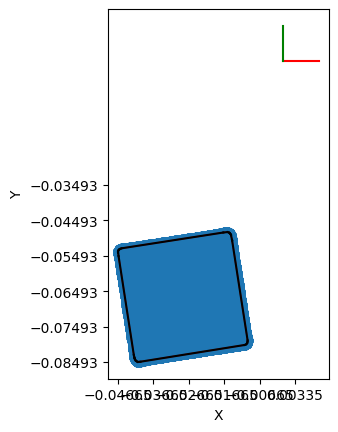

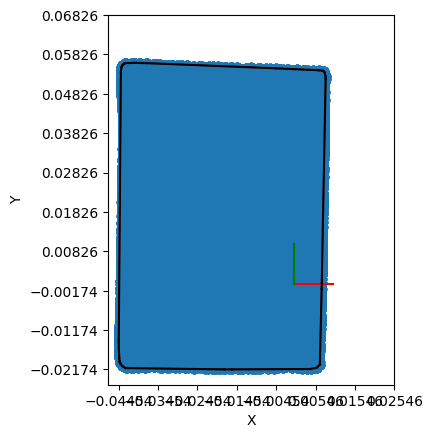

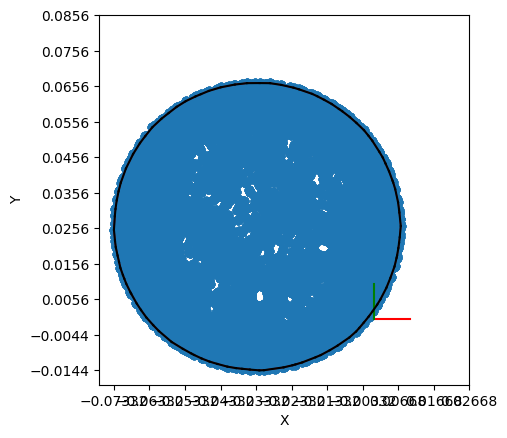

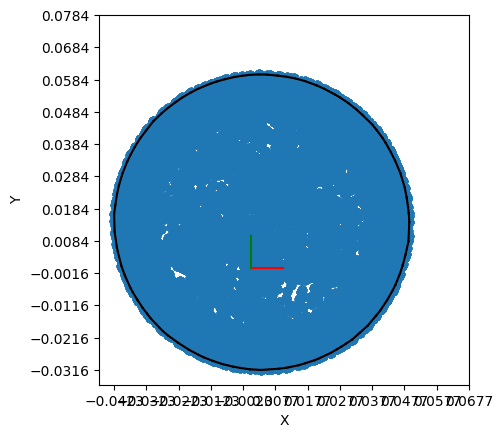

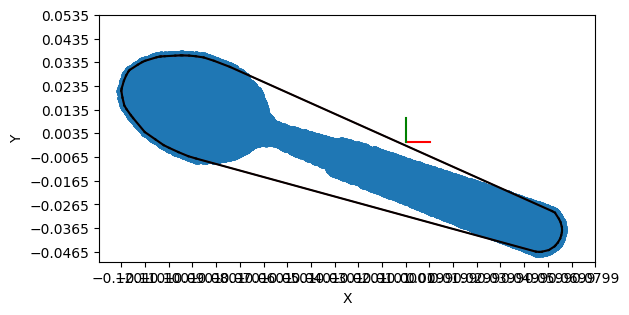

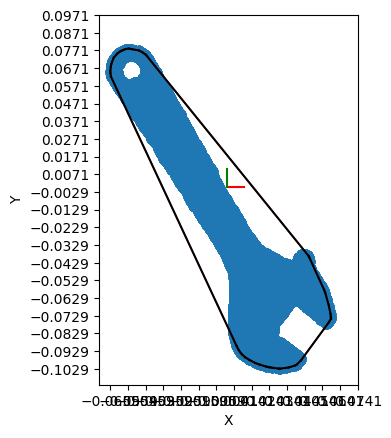

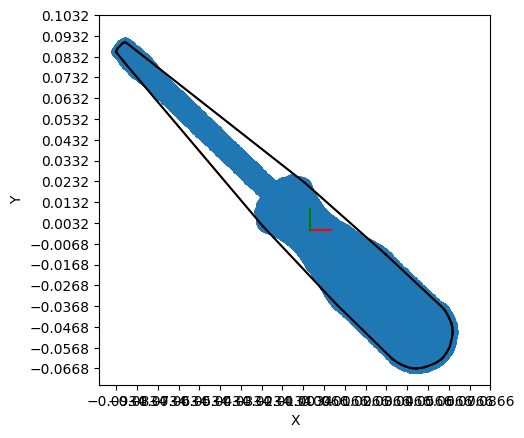

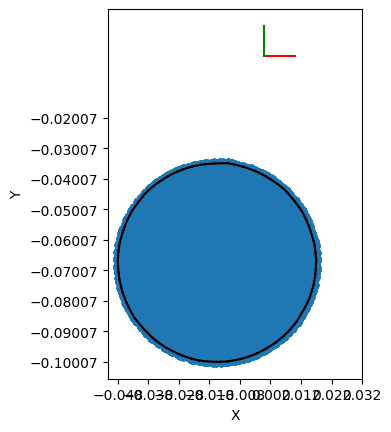

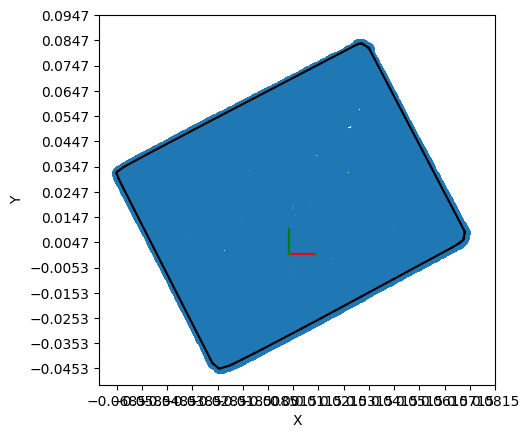

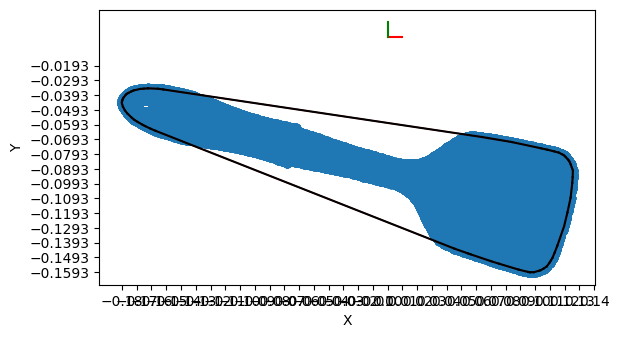

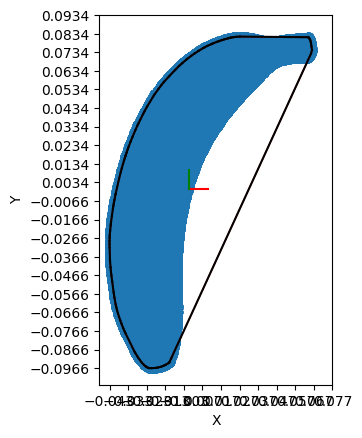

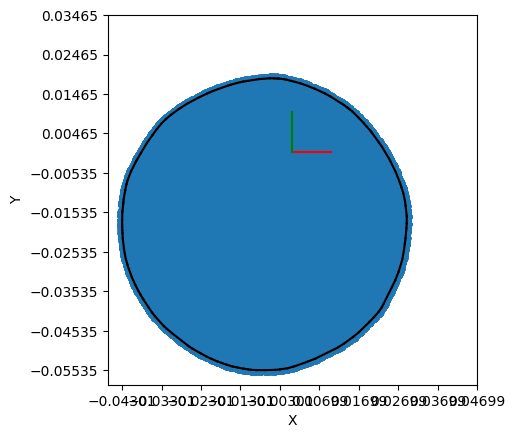

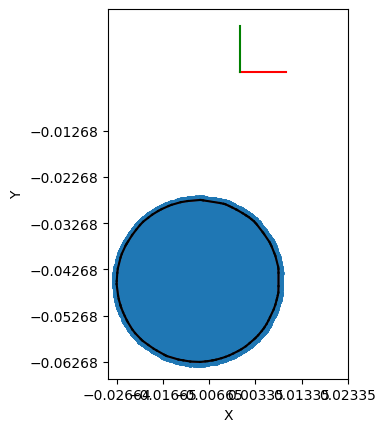

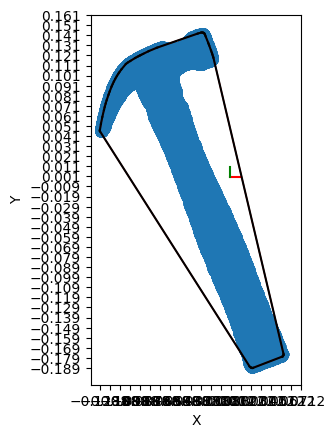

In [2]:
import cv2
import pywavefront
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
from PIL import Image, ImageDraw, ImageFont
import io
import os


# Constants
MARKER_ID = 6
# Replace with your specific 3D object file path from google_16k in YCB models 
# FILE_PATH = '/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/003_cracker_box/google_16k/textured.obj'
# Save the Arimo zip file on your system and replace the FONT_PATH with yours 
FONT_PATH = "/home/jose/Downloads/Arimo/Arimo-VariableFont_wght.ttf"
# Change the output folder according to your wish.
# OUTPUT_PDF_PATH = f'/home/jose/Downloads/templates/{os.path.basename(os.path.dirname(os.path.dirname(FILE_PATH)))}.pdf'
FONT_SIZE = 30  # Adjust the size as needed
# New Constants for Font Sizes
TITLE_FONT_SIZE = 40
ANNOTATION_FONT_SIZE = 30
AXES_FONT_SIZE = 30
DISTANCE_CAPTION_FONT_SIZE = 40

PLOT_DPI = 300

# Parameterized values
ARUCO_SIZE = 500  # The size of the ARUCO marke
ARUCO_DICT = cv2.aruco.DICT_4X4_250  # The ARUCO dictionary

# Both for changing plot's position 
PLOT_X_OFFSET = -34  # The offset for the plot's x-position
PLOT_Y_OFFSET = -250  # The offset for the plot's y-position

# Both for changing Marker's position 
MARKER_X_OFFSET = 922  # The offset for the marker's x-position
MARKER_Y_POS = 0  # The y-position of the marker

# Both for changing Black lines's position 
INTERSECTION_X_OFFSET = 400  # The offset for the intersection's x-position
INTERSECTION_Y_OFFSET = 1100  # The offset for the intersection's y-position

X_RANGE = 0.210
Y_RANGE = 0.297
INTERVAL_VALUE = 20
X_AXIS_TEXT_COORDS = (1700, 3000)
Y_AXIS_TEXT_COORDS = (2100, 200)
# Constants for title position
TITLE_X_POS = 200
TITLE_Y_POS = 3150  # Or just calculate the exact position you want


# Additional Constants for annotation positions and increments
ANNOTATION_START_X = 200
ANNOTATION_START_Y = 3200
ANNOTATION_LINE_SPACING = 30

def find_inersection_point(image):
    # Convert to RGB (OpenCV uses BGR by default)
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define range of red and green colors in RGB
    lower_red = np.array([100, 0, 0])
    upper_red = np.array([255, 100, 100])
    lower_green = np.array([0, 100, 0])  # Adjust these values based on your actual green
    upper_green = np.array([100, 255, 100])  
    
    # Threshold the RGB image to get only red and green colors
    mask_red = cv2.inRange(image, lower_red, upper_red)
    mask_green = cv2.inRange(image, lower_green, upper_green)
    
    # Find contours for the red and green lines
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if contours are found, if not, print an error message
    if not contours_red or not contours_green:
        print("No contours found for red or green lines. Check the color thresholds and make sure the lines are visible in the image.")
        # Green_Mask = 'Green Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Green_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Green_Mask, 800, 600)
        # Red_Mask = 'Red Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Red_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Red_Mask, 800, 600)
        # # Show the image
        # window_name = 'Image with joint point'
        # cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(window_name, 800, 600) 
        # cv2.imshow(window_name, image)
        # cv2.imshow('Red Mask', mask_red)
        # cv2.imshow('Green Mask', mask_green)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

    else:
        # Assume the longest contour in each color is the line we want
        red_line = max(contours_red, key=cv2.contourArea)
        green_line = max(contours_green, key=cv2.contourArea)
    
        # Find the endpoints of each line
        red_line_endpoint = tuple(red_line[red_line[:, :, 0].argmin()][0])
        green_line_endpoint = tuple(green_line[green_line[:, :, 0].argmin()][0])
    
        # Now, we find the point closest between the two lines
        # For simplicity, we are assuming that they join at the ends closest to the origin (0,0)
        joint_point = (max(red_line_endpoint[0], green_line_endpoint[0]), max(red_line_endpoint[1], green_line_endpoint[1]))
    
        # Draw a black circle at the joint point
        cv2.circle(image, joint_point, 200, (0,0,0), 2)  # Circle with a thickness of 2 pixels
    
        # Convert joint point to inches
        scaling_factor_x = 11.69/ image.shape[1]
        scaling_factor_y = 16.54 / image.shape[0]
    
        real_world_x = joint_point[0] * scaling_factor_x
        real_world_y = (image.shape[0] - joint_point[1]) * scaling_factor_y  # Convert y-coordinate because image origin (0,0) is at the top-left
        print(f"Joint point at ({joint_point[0]}, {joint_point[1]}) pixel")
        print(f"Joint point at ({real_world_x}, {real_world_y}) inches")
    
        # # Set a window name
        # window_name = 'Image with joint point'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(window_name, 800, 600) 
        # Green_Mask = 'Green Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Green_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Green_Mask, 800, 600)
        # Red_Mask = 'Red Mask'
        # # Resize the window according to the screen resolution
        # cv2.namedWindow(Red_Mask, cv2.WINDOW_NORMAL)
        # cv2.resizeWindow(Red_Mask, 800, 600)
        # # Show the image
        # cv2.imshow(window_name, image)
        # cv2.imshow('Red Mask', mask_red)
        # cv2.imshow('Green Mask', mask_green)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()

    return image,joint_point
        
def add_annotations(draw, annotations, start_x, start_y, line_spacing, font_path, font_size):
    try:
        font = ImageFont.truetype(font_path, size=font_size)
    except OSError:
        font = ImageFont.load_default()

    y_pos = start_y
    for annotation in annotations:
        draw.text((start_x, y_pos), annotation, font=font, fill=(0, 0, 0))
        y_pos += line_spacing
        

def generate_aruco_marker(id, size=ARUCO_SIZE, dictionary=ARUCO_DICT):
    aruco_dict = cv2.aruco.Dictionary_get(dictionary)
    marker_img = cv2.aruco.drawMarker(aruco_dict, id, size)
    return marker_img

def plot_object(file_path):
    scene = pywavefront.Wavefront(file_path)
    items = list(scene.materials.items())
    ver = items[0][1].vertices
    n_ver = int(len(ver)/8)
    v = np.zeros((n_ver,3))
    for i in range(n_ver):
        v[i,:] = ver[8*i+5:8*i+5+3]
    v = v[np.argsort(v[:,2]),:]
    min_z = np.min(v[:1000000, 2])  # Added this line for z-axis minimum value
    max_z = np.max(v[:1000000, 2])  # Added this line for z-axis maximum value
    fig, ax = plt.subplots()
    
    
    ax.scatter(v[:1000000,0],v[:1000000,1])
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.plot([0,0.01],[0,0],c='r')
    ax.plot([0,0],[0,0.01],c='g')
    ax.set_aspect('equal', 'box')

    hull = ConvexHull(v[:1000000, :2])
    for simplex in hull.simplices:
        plt.plot(hull.points[simplex, 0], hull.points[simplex, 1], 'k-')
    polygon = Polygon(hull.points[hull.vertices], fill=None, edgecolor='r', linewidth=1)
    ax.add_patch(polygon)
    
    points = hull.points[hull.vertices]
    x1, y1 = points[0]
    x2, y2 = points[1]
    m = (y2 - y1) / (x2 - x1)
    angle_with_x_axis = np.degrees(np.arctan(m))
    angle_with_y_axis = 90 - abs(angle_with_x_axis)

    x_ticks = np.arange(min(v[:,0]), max(v[:,0])+0.02, 0.01)
    y_ticks = np.arange(min(v[:,1]), max(v[:,1])+0.02, 0.01)
    ax.set_xticks(x_ticks)
    ax.set_yticks(y_ticks)

    return fig, v,angle_with_x_axis, angle_with_y_axis, min_z, max_z
    
def draw_axes_on_a3(a3_img, v, width, height, X_RANGE, Y_RANGE, INTERVAL_VALUE, 
                    X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS):
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(FONT_PATH, size=AXES_FONT_SIZE)  # Try to use Arial font
    except OSError:
        font = ImageFont.load_default()  # If Arial isn't available, use the default PIL font

    draw.line([(0, height - 1), (width, height - 1)], fill=(0, 0, 0))  # X-axis
    draw.line([(0, 0), (0, height)], fill=(0, 0, 0))  # Y-axis
    
    x_min, x_max = min(v[:, 0]), max(v[:, 0])
    y_min, y_max = min(v[:, 1]), max(v[:, 1])

    x_ticks_interval = width // INTERVAL_VALUE
    y_ticks_interval = height // INTERVAL_VALUE

    x_value_interval = X_RANGE / INTERVAL_VALUE
    y_value_interval = Y_RANGE / INTERVAL_VALUE

    x_values_drawn = set()
    y_values_drawn = set()

    x_text_x, x_text_y = X_AXIS_TEXT_COORDS
    y_text_x, y_text_y = Y_AXIS_TEXT_COORDS
    
    draw.text((x_text_x, height - x_text_y), "X-Axis", font=font, fill=(0, 0, 0))
    draw.text((y_text_x, y_text_y), "Y-Axis", font=font, fill=(0, 0, 0))
    

    for i in range(0, width + 1, x_ticks_interval):
        value = x_min-0.07 + (i / width) * X_RANGE
        value_rounded = round(value, 2)
        if value_rounded not in x_values_drawn:
            x_values_drawn.add(value_rounded)
            draw.line([(i, height - 1), (i, height - 20)], fill=(0, 0, 0))
            draw.text((i - 10, height - 40), f"{value_rounded:.2f}", font=font, fill=(0, 0, 0))

    for i in range(0, height + 1, y_ticks_interval):
        value = y_max+0.15 - (i / height) * Y_RANGE
        value_rounded = round(value, 2)
        if value_rounded not in y_values_drawn:
            y_values_drawn.add(value_rounded)
            draw.line([(0, i), (20, i)], fill=(0, 0, 0))
            draw.text((25, i - 10), f"{value_rounded:.2f}", font=font, fill=(0, 0, 0))

    return a3_img

def get_intersection_point():
    return 0, 0

def create_layout_with_annotations(marker_id, file_path, dpi, font_path, marker_x_offset, marker_y_pos, plot_x_offset, plot_y_offset, title_x_pos, title_y_pos, axes_text_coords, interval_value, x_range, y_range, annotation_start_x, annotation_start_y, annotation_line_spacing, annotation_font_size, title_font_size, distance_caption_font_size, intersection_x_offset, intersection_y_offset):
    # Generate ARUCO marker
    marker_img = generate_aruco_marker(marker_id)
    marker_pil_img = Image.fromarray(marker_img)
    marker_pil_img = marker_pil_img.rotate(-90, expand=1)

    # Plot object
    object_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  
    fig, v, angle_with_x_axis, angle_with_y_axis, min_z, max_z = plot_object(file_path)

    # Save plot to PIL image
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
    buf.seek(0)
    plot_pil_img = Image.open(buf)
    
    a3_pixel_width = int(11.69 * 300)  # width in pixels
    a3_pixel_height = int( 16.54* 300)  # height in pixels
    a3_img = Image.new('RGB', (a3_pixel_width, a3_pixel_height), (255, 255, 255))

    # Positioning the elements
    marker_x_pos = (a3_pixel_width - marker_pil_img.width) // 2 - plot_pil_img.width // 6 + marker_x_offset
    plot_x_pos = (a3_pixel_width - plot_pil_img.width) // 2 + plot_x_offset
    plot_y_pos = a3_pixel_height - plot_pil_img.height + plot_y_offset 
    print(plot_x_pos,plot_y_pos)

    # Paste elements
    a3_img.paste(marker_pil_img, (marker_x_pos, marker_y_pos))
    a3_img.paste(plot_pil_img, (plot_x_pos, plot_y_pos))

    # Draw title
    draw = ImageDraw.Draw(a3_img)
    try:
        title_font = ImageFont.truetype(font_path, size=title_font_size)
    except OSError:
        title_font = ImageFont.load_default()
    draw.text((title_x_pos, title_y_pos), object_name, font=title_font, fill=(0, 0, 0))

    # Draw axes
    a3_img = draw_axes_on_a3(a3_img, v, a3_pixel_width, a3_pixel_height, x_range, y_range, interval_value, axes_text_coords[0], axes_text_coords[1])

    # Add annotations
    annotations = [
        f"Angle with x-axis (degrees): {angle_with_x_axis:.2f}",
        f"Angle with y-axis (degrees): {angle_with_y_axis:.2f}",
        f"Z Min: {min_z:.6f}",
        f"Z Max: {max_z:.6f}"
    ]
    add_annotations(draw, annotations, annotation_start_x, annotation_start_y, annotation_line_spacing, font_path, annotation_font_size)

    # Calculate intersection point
    intersection_x, intersection_y = get_intersection_point()
    y_scale_factor = plot_pil_img.height / (max(v[:1000000,1]) - min(v[:1000000,1]))
    intersection_pixel_y = (max(v[:1000000, 1]) - intersection_y) * y_scale_factor

    intersection_x_a3 = plot_x_pos + plot_pil_img.width / 2 + intersection_x_offset
    intersection_y_a3 = plot_y_pos + intersection_pixel_y + intersection_y_offset

    # Draw line and text for distance caption
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(font_path, size=distance_caption_font_size)
    except OSError:
        font = ImageFont.load_default()
    draw.line([(intersection_x_a3, intersection_y_a3), (intersection_x_a3, marker_y_pos + marker_pil_img.height)], fill=(0, 0, 0))
    draw.text((intersection_x_a3 + 10, (intersection_y_a3 + marker_y_pos + marker_pil_img.height) / 2), "10 cm", font=font, fill=(0, 0, 0))

    return a3_img

def recreate_layout_with_annotations(marker_id, file_path, dpi, font_path, new_marker_x, marker_y_pos, plot_x_offset, plot_y_offset, title_x_pos, title_y_pos, axes_text_coords, interval_value, x_range, y_range, annotation_start_x, annotation_start_y, annotation_line_spacing, annotation_font_size, title_font_size, distance_caption_font_size, intersection_x_offset, intersection_y_offset):
    # Generate ARUCO marker
    marker_img = generate_aruco_marker(marker_id)
    marker_pil_img = Image.fromarray(marker_img)
    marker_pil_img = marker_pil_img.rotate(-90, expand=1)

    # Plot object
    object_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  
    fig, v, angle_with_x_axis, angle_with_y_axis, min_z, max_z = plot_object(file_path)

    # Save plot to PIL image
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
    buf.seek(0)
    plot_pil_img = Image.open(buf)
    
    a3_pixel_width = int(11.69 * 300)  # width in pixels
    a3_pixel_height = int( 16.54* 300)  # height in pixels
    a3_img = Image.new('RGB', (a3_pixel_width, a3_pixel_height), (255, 255, 255))

    # Positioning the elements
    marker_x_pos = new_marker_x[0]
    plot_x_pos = (a3_pixel_width - plot_pil_img.width) // 2 + plot_x_offset
    plot_y_pos = a3_pixel_height - plot_pil_img.height + plot_y_offset 
    print(plot_x_pos,plot_y_pos)

    # Paste elements
    a3_img.paste(marker_pil_img, (marker_x_pos, marker_y_pos))
    a3_img.paste(plot_pil_img, (plot_x_pos, plot_y_pos))

    # Draw title
    draw = ImageDraw.Draw(a3_img)
    try:
        title_font = ImageFont.truetype(font_path, size=title_font_size)
    except OSError:
        title_font = ImageFont.load_default()
    draw.text((title_x_pos, title_y_pos), object_name, font=title_font, fill=(0, 0, 0))

    # Draw axes
    a3_img = draw_axes_on_a3(a3_img, v, a3_pixel_width, a3_pixel_height, x_range, y_range, interval_value, axes_text_coords[0], axes_text_coords[1])

    # Add annotations
    annotations = [
        f"Angle with x-axis (degrees): {angle_with_x_axis:.2f}",
        f"Angle with y-axis (degrees): {angle_with_y_axis:.2f}",
        f"Z Min: {min_z:.6f}",
        f"Z Max: {max_z:.6f}"
    ]
    add_annotations(draw, annotations, annotation_start_x, annotation_start_y, annotation_line_spacing, font_path, annotation_font_size)

    # Calculate intersection point
    intersection_x, intersection_y = get_intersection_point()
    y_scale_factor = plot_pil_img.height / (max(v[:1000000,1]) - min(v[:1000000,1]))
    intersection_pixel_y = (max(v[:1000000, 1]) - intersection_y) #* y_scale_factor

    intersection_x_a3 = marker_x_pos
    intersection_y_a3 = plot_y_pos + intersection_pixel_y + intersection_y_offset

    # Draw line and text for distance caption
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(font_path, size=distance_caption_font_size)
    except OSError:
        font = ImageFont.load_default()

    a3_width_cm = 29.7
    a3_height_cm = 42.0
    
    # Dimensions of the A3 image in pixels
    a3_pixel_width = a3_img.width
    a3_pixel_height = a3_img.height
    
    # Calculate scaling factors for both dimensions (cm/pixel)
    scaling_factor_x = a3_width_cm / a3_pixel_width
    scaling_factor_y = a3_height_cm / a3_pixel_height
    
    # Use the average of the scaling factors for X and Y if they are different
    scaling_factor = (scaling_factor_x + scaling_factor_y) / 2
    bottom_left_x = marker_x_pos
    bottom_left_y = marker_y_pos + marker_pil_img.height
    # Calculate distance
    distance_pixels = np.sqrt((new_marker_x[0] - bottom_left_x)**2 + (new_marker_x[1] - bottom_left_y)**2)
    
    # Convert pixel distance to centimeters
    distance_cm = distance_pixels * scaling_factor
    draw.line([(intersection_x_a3, intersection_y_a3), (intersection_x_a3, marker_y_pos + marker_pil_img.height)], fill=(0, 0, 0))
    draw.text((intersection_x_a3 + 10, (intersection_y_a3 + marker_y_pos + marker_pil_img.height) / 2), str(distance_cm)+" "+ "cm", font=font, fill=(0, 0, 0))

    return a3_img


if __name__ == "__main__":
    # Base directory path
    base_dir = '/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/'
    # List all directories in the base path
    model_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    # Construct the file path for each model
    for model_dir in model_dirs:
        FILE_PATH = os.path.join(base_dir, model_dir, 'google_16k', 'textured.obj')
        OUTPUT_PDF_PATH = f'/home/jose/Downloads/templates/{os.path.basename(os.path.dirname(os.path.dirname(FILE_PATH)))}.pdf'
        if os.path.isfile(FILE_PATH):
            a3_img = create_layout_with_annotations(MARKER_ID, FILE_PATH, PLOT_DPI, FONT_PATH, MARKER_X_OFFSET, MARKER_Y_POS, PLOT_X_OFFSET, PLOT_Y_OFFSET, TITLE_X_POS, TITLE_Y_POS, (X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS), INTERVAL_VALUE, X_RANGE, Y_RANGE, ANNOTATION_START_X, ANNOTATION_START_Y, ANNOTATION_LINE_SPACING, ANNOTATION_FONT_SIZE, TITLE_FONT_SIZE, DISTANCE_CAPTION_FONT_SIZE, INTERSECTION_X_OFFSET, INTERSECTION_Y_OFFSET)
            output_pdf_path = OUTPUT_PDF_PATH
            if isinstance(a3_img, Image.Image):
                print("yes")
                a3_img_rgb = a3_img.convert('RGB')
                image_np = np.array(a3_img_rgb)
                new_a3_img,intersection_points = find_inersection_point(image_np)
                pdf_a3_img = Image.fromarray(new_a3_img)
            new_marker_x = intersection_points
            print(new_marker_x)
            pdf_a3_img.save(output_pdf_path, "PDF", resolution=100.0)
            new_a3_img = recreate_layout_with_annotations(MARKER_ID, FILE_PATH, PLOT_DPI, FONT_PATH, new_marker_x,MARKER_Y_POS, PLOT_X_OFFSET, PLOT_Y_OFFSET, TITLE_X_POS, TITLE_Y_POS, (X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS), INTERVAL_VALUE, X_RANGE, Y_RANGE, ANNOTATION_START_X, ANNOTATION_START_Y, ANNOTATION_LINE_SPACING, ANNOTATION_FONT_SIZE, TITLE_FONT_SIZE, DISTANCE_CAPTION_FONT_SIZE, INTERSECTION_X_OFFSET, INTERSECTION_Y_OFFSET)
            if isinstance(new_a3_img, Image.Image):
                print("yes")
                new_a3_img_rgb = new_a3_img.convert('RGB')
                new_image_np = np.array(new_a3_img_rgb)
                next_new_a3_img,new_intersection_points = find_inersection_point(new_image_np)
                new_pdf_a3_img = Image.fromarray(next_new_a3_img)
            new_pdf_a3_img.save(output_pdf_path, "PDF", resolution=100.0)
            plt.close()


In [6]:
# Constants for conversion and DPI
mm_to_inch = 25.4  # millimeters to inches
dpi = 300  # dots per inch

# Example model dimensions in millimeters (length, width, height)
model_dimensions = {
    "003_cracker_box": (60, 158, 210),
    "004_sugar_box": (38, 89, 175),
    "009_gelatin_box": (35, 110, 89),
    "008_pudding_box": (28, 85, 73),
    "010_potted_meat_can": (50, 97, 82),
    "002_master_chef_can": (102, 139, None),
    "007_tuna_fish_can": (85, 33, None),
    "001_chips_can": (75, 250, None),
    "006_mustard_bottle": (50, 85, 175),
    "005_tomato_soup_can": (66, 101, None),
    "011_banana": (36, 190, None),
    "012_strawberry": (43.8, 55, None),
    "013_apple": (75, None, None),
    "014_lemon": (54, 68, None),
    "015_peach": (59, None, None),
    "016_pear": (66.2, 100, None),
    "017_orange": (73, None, None),
    "018_plum": (52, None, None),
    "022_windex_bottle": (80, 105, 270),
    "021_bleach_cleanser": (250, 98, 65),
    "026_sponge": (72, 114, 14),
    "019_pitcher_base": (108, 235, None),
    "023_pitcher_lid": (123, 48, None),  # Updated to best match
    "029_plate": (258, 24, None),
    "024_bowl": (159, 53, None),
    "030_fork": (14, 20, 198),
    "031_spoon": (14, 20, 195),
    "032_knife": (14, 20, 215),
    "033_spatula": (83, 35, 350),
    "073-a_wine_glass": (89, 137, None),  # Updated to best match
    "025_mug": (80, 82, None),
    "028_skillet_lid": (270, 25, 30),  # Updated to best match
    "028_skillet_lid": (270, 10, 22),  # Skillet Lid matches with 028_skillet_lid
    "034_table_cloth": (228, 335, None),  # Assuming 034 as best match
    "037_scissors": (87, 200, 14),
    "040_large_marker": (18, 121, None),
    "041_small_marker": (8, 135, None),
    "038_padlock": (24, 47, 65),
    "048_hammer": (34, 32, 135),
    "040_nails": (4, 25, None),  # Assuming 040 as best match for nails
    "047_bolt_nut": (43, 16, None),  # Assuming 047 as best match
    "043_phillips_screwdriver": (31, 215, None),
    "044_flat_screwdriver": (31, 215, None),
    "042_adjustable_wrench": (5, 55, 205),
    "036_wood_block": (85, 85, 200),
    "052_clamps": (165, 213, 37),  # Assuming 052 as best match
    "035_power_drill": (35, 46, 184),
    "048_credit_card": (54, 85, 1),  # Assuming 048 as best match
    "053_mini_soccer_ball": (140, None, None),
    "055_soft_ball": (96, None, None),
    "055_baseball": (80, None, None),
    "056_tennis_ball": (64.7, None, None),
    "057_racquetball": (55.3, None, None),
    "058_golf_ball": (42.7, None, None),
    "063_marbles": (None, None, None),  # Assuming 063 as best match for marbles
    "065_cups": (55, 60, None),  # Assuming 065 as best match for cups
    "061_foam_brick": (50, 75, 50),
    "062_dice": (16.2, None, None),
    "059_washers": (6.4, None, None),  # Assuming 059 as best match
    "060_rope": (3000, 4.7, None),
    "059_chain": (2, 4, 130),  # Assuming 059 as best match for chain
    "077_rubiks_cube": (57, 57, 57),
    "063_clear_box": (292, 429, 149),  # Assuming 063 as best match
    "063_box_lid": (292, 429, 20),  # Assuming 063 as best match for box lid
    "070_colored_wood_blocks": (26, None, None),  # Assuming 070 as best match
    "071_nine_hole_peg_test": (1150, 1200, 1200),
    "072_toy_airplane": (171, 266, 280),  # Assuming 072 as best match
    "073_lego_duplo": (16, 9.5, 5.5),  # Assuming 073 as best match
    "069_magazine": (256, 200, 1.6),  # Assuming 069 as best match
    "070_black_t-shirt": (736, 736, None),  # Assuming 070 as best match
    "076_timer": (8, 8.5, 4.5),
    "072_footlocker": (31.13, 17.5, 13.88)  # Assuming 072 as best match
    # ... Continue adding other items as needed
}

# Convert all model dimensions from the provided list to pixels

def convert_dimensions_to_pixels(dimensions_mm, dpi):
    # Use 1 mm for None dimensions (negligible in 2D representation)
    length_mm, width_mm, height_mm = [d if d is not None else 0 for d in dimensions_mm]

    # Convert mm to inches
    length_in = length_mm / mm_to_inch
    width_in = width_mm / mm_to_inch
    height_in = height_mm / mm_to_inch

    # Convert inches to pixels
    length_px = int(length_in * dpi)
    width_px = int(width_in * dpi)
    height_px = int(height_in * dpi)
    return length_px, width_px, height_px

# Convert all model dimensions in the dictionary
model_dimensions_pixels = {model: convert_dimensions_to_pixels(dimensions, dpi) 
                           for model, dimensions in model_dimensions.items()}

model_dimensions_pixels



{'003_cracker_box': (708, 1866, 2480),
 '004_sugar_box': (448, 1051, 2066),
 '009_gelatin_box': (413, 1299, 1051),
 '008_pudding_box': (330, 1003, 862),
 '010_potted_meat_can': (590, 1145, 968),
 '002_master_chef_can': (1204, 1641, 0),
 '007_tuna_fish_can': (1003, 389, 0),
 '001_chips_can': (885, 2952, 0),
 '006_mustard_bottle': (590, 1003, 2066),
 '005_tomato_soup_can': (779, 1192, 0),
 '011_banana': (425, 2244, 0),
 '012_strawberry': (517, 649, 0),
 '013_apple': (885, 0, 0),
 '014_lemon': (637, 803, 0),
 '015_peach': (696, 0, 0),
 '016_pear': (781, 1181, 0),
 '017_orange': (862, 0, 0),
 '018_plum': (614, 0, 0),
 '022_windex_bottle': (944, 1240, 3188),
 '021_bleach_cleanser': (2952, 1157, 767),
 '026_sponge': (850, 1346, 165),
 '019_pitcher_base': (1275, 2775, 0),
 '023_pitcher_lid': (1452, 566, 0),
 '029_plate': (3047, 283, 0),
 '024_bowl': (1877, 625, 0),
 '030_fork': (165, 236, 2338),
 '031_spoon': (165, 236, 2303),
 '032_knife': (165, 236, 2539),
 '033_spatula': (980, 413, 4133),


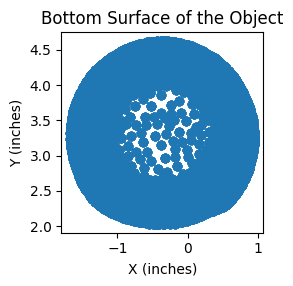

Total Object Dimensions - Length: 6.7911 cm, Width: 6.7743  cm , Height: 10.1855 cm
Bottom Surface Dimensions - Length: 2.6099620392999996,inch Width: 2.6025210904 inch cm


In [3]:
import numpy as np
import pywavefront
import matplotlib.pyplot as plt

def load_mesh_model(file_path):
    scene = pywavefront.Wavefront(file_path)
    items = list(scene.materials.items())
    ver = items[0][1].vertices
    n_ver = int(len(ver)/8)
    v = np.zeros((n_ver,3))
    for i in range(n_ver):
        v[i,:] = ver[8*i+5:8*i+5+3]
    return v

def calculate_dimensions(vertices):
    x_min, x_max = np.min(vertices[:, 0]), np.max(vertices[:, 0])
    y_min, y_max = np.min(vertices[:, 1]), np.max(vertices[:, 1])
    z_min, z_max = np.min(vertices[:, 2]), np.max(vertices[:, 2])
    return x_max - x_min, y_max - y_min, z_max - z_min

def plot_bottom_surface(vertices, z_threshold=0.05, dpi=300):
    # Define blue color range
    lower_blue = np.array([100, 0, 0])
    upper_blue = np.array([255, 100, 100])
    
    # DPI and A3 sheet dimensions
    dpi = 300
    a3_width = int(11.69 * dpi)
    a3_height = int(16.54 * dpi)
    meter_to_inch = 39.3701  # conversion factor from meters to inches

    z_min = np.min(vertices[:, 2])
    bottom_vertices = vertices[np.abs(vertices[:, 2] - z_min) <= z_threshold]
    x_min, x_max = np.min(bottom_vertices[:, 0]), np.max(bottom_vertices[:, 0])
    y_min, y_max = np.min(bottom_vertices[:, 1]), np.max(bottom_vertices[:, 1])
    
    # Convert from meters to inches
    bottom_length_inch = (x_max - x_min) * meter_to_inch
    bottom_width_inch = (y_max - y_min) * meter_to_inch

    fig, ax = plt.subplots()
    ax.scatter(bottom_vertices[:, 0] * meter_to_inch, bottom_vertices[:, 1] * meter_to_inch)
    ax.set_xlabel('X (inches)')
    ax.set_ylabel('Y (inches)')
    ax.set_title('Bottom Surface of the Object')
    ax.axis('equal')

    # Set the size of the plot to match the actual dimensions of the object's bottom surface in inches
    fig.set_size_inches(bottom_length_inch, bottom_width_inch)
    
    # Save the figure with the specified DPI
    plt.savefig('bottom_surface_plot.png', dpi=dpi)
    plt.show()
    # Load the plot image

    plot_img_rgb = cv2.cvtColor(fig, cv2.COLOR_BGR2RGB)

    # Create a mask for blue color
    mask = cv2.inRange(plot_img_rgb, lower_blue, upper_blue)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No blue shape found")

    # Get the largest contour, assuming it's the blue shape
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    # Crop and resize the blue shape
    blue_shape = plot_img_rgb[y:y+h, x:x+w]
    blue_shape_pil = Image.fromarray(blue_shape)
    blue_shape_pil = blue_shape_pil.resize((int(w * dpi / 25.4), int(h * dpi / 25.4)), Image.ANTIALIAS)  # Convert mm to inches, then to pixels

    return bottom_length_inch, bottom_width_inch



# Example usage
file_path = r'/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/005_tomato_soup_can/google_16k/textured.obj'  # Replace with your actual file path
vertices = load_mesh_model(file_path)
length, width, height = calculate_dimensions(vertices)
bottom_length, bottom_width = plot_bottom_surface(vertices)

print(f"Total Object Dimensions - Length: {length*100} cm, Width: {width*100}  cm , Height: {height*100} cm")
print(f"Bottom Surface Dimensions - Length: {bottom_length},inch Width: {bottom_width} inch cm")


023_wine_glass
063-d_marbles
018_plum


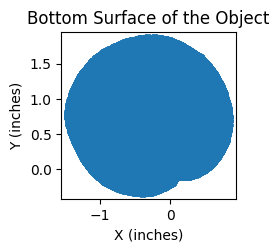

Total Object Dimensions - Length: 5.719 cm, Width: 5.4940999999999995  cm , Height: 5.303999999999999 cm
Bottom Surface Dimensions - Length: 2.2515760190000003,inch Width: 2.1630326640999997 inch
1299 3960
(1787, 4661)
063-f_marbles
037_scissors


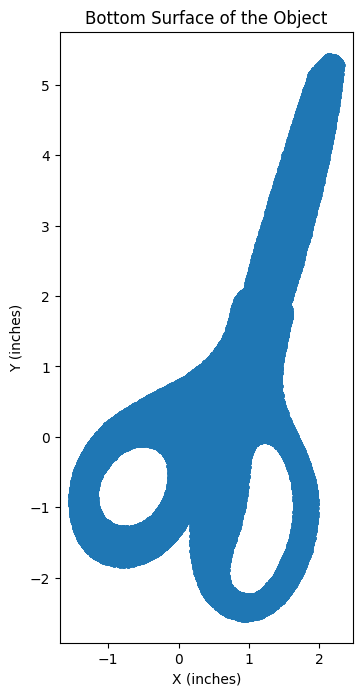

Total Object Dimensions - Length: 9.608 cm, Width: 20.152399999999997  cm , Height: 1.5671000000000002 cm
Bottom Surface Dimensions - Length: 3.7826792080000002,inch Width: 7.934020032399999 inch
1175 2627
(1837, 4662)
021_bleach_cleanser


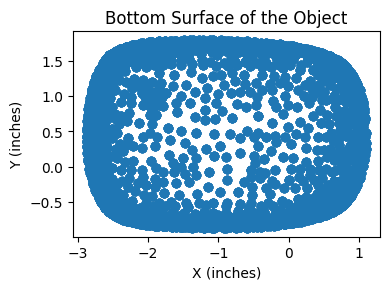

Total Object Dimensions - Length: 10.2433 cm, Width: 6.769900000000001  cm , Height: 25.058000000000003 cm
Bottom Surface Dimensions - Length: 3.9654352122000005,inch Width: 2.6653163999000005 inch
1134 3844
(1857, 4662)
073-a_lego_duplo


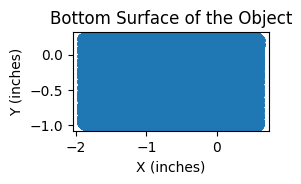

Total Object Dimensions - Length: 6.411899999999999 cm, Width: 3.2515  cm , Height: 2.3928 cm
Bottom Surface Dimensions - Length: 2.5243714419,inch Width: 1.2801188015 inch
1266 4164
(1821, 4662)
054_softball


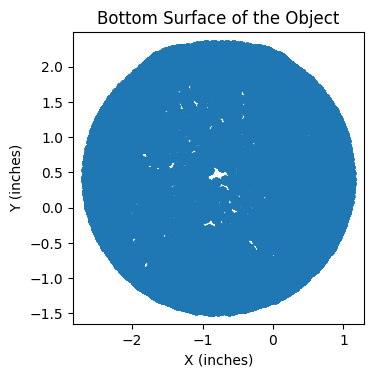

Total Object Dimensions - Length: 9.536999999999999 cm, Width: 9.617400000000002  cm , Height: 9.459100000000001 cm
Bottom Surface Dimensions - Length: 3.754726437,inch Width: 3.7863799974000005 inch
1159 3585
(1857, 4661)
003_cracker_box


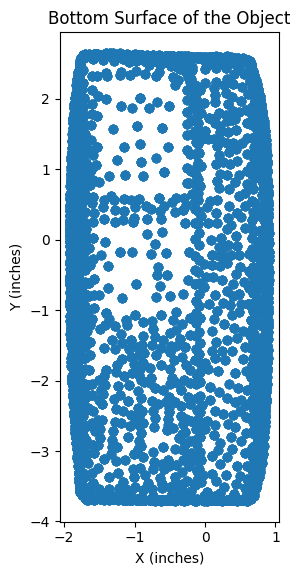

Total Object Dimensions - Length: 7.180000000000001 cm, Width: 16.4036  cm , Height: 21.3437 cm
Bottom Surface Dimensions - Length: 2.8261432584,inch Width: 6.356066424399999 inch
1268 2991
(1818, 4661)
001_chips_can
052_extra_large_clamp


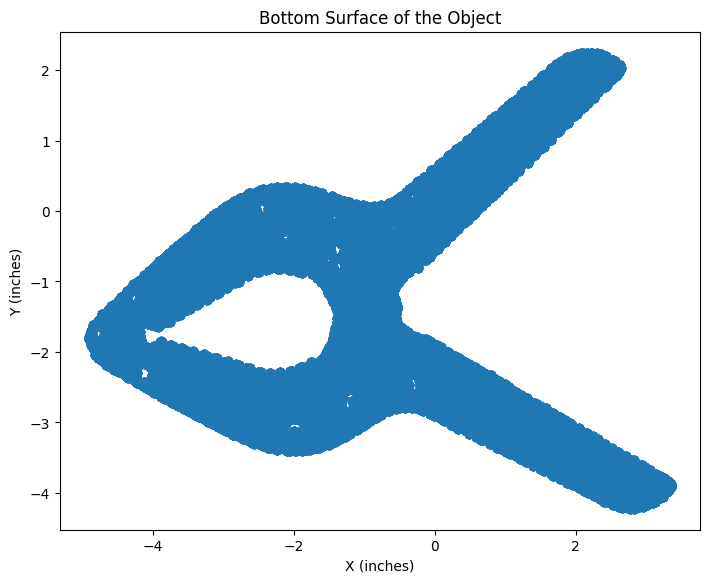

Total Object Dimensions - Length: 20.9954 cm, Width: 16.4344  cm , Height: 3.6316999999999995 cm
Bottom Surface Dimensions - Length: 8.2659099754,inch Width: 6.4702397144 inch
654 2965
(1837, 4661)
058_golf_ball


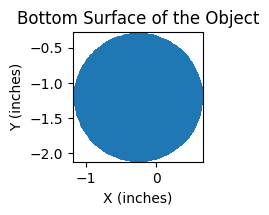

Total Object Dimensions - Length: 4.2679 cm, Width: 4.272099999999999  cm , Height: 4.237500000000001 cm
Bottom Surface Dimensions - Length: 1.6802764979,inch Width: 1.6819300420999999 inch
1315 4071
(1772, 4661)
030_fork


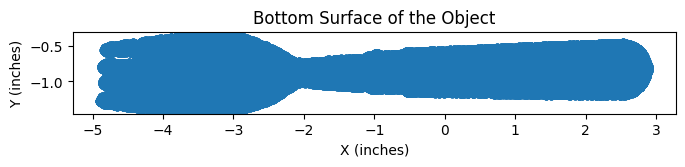

Total Object Dimensions - Length: 19.7556 cm, Width: 2.7110000000000003  cm , Height: 1.5884000000000003 cm
Bottom Surface Dimensions - Length: 7.7777994756,inch Width: 1.067323411 inch
691 4213
(1857, 4661)
073-m_lego_duplo
015_peach


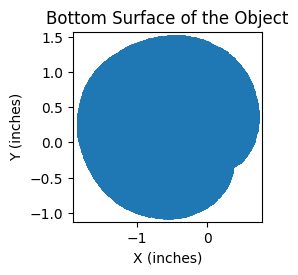

Total Object Dimensions - Length: 6.2123 cm, Width: 6.2632  cm , Height: 5.8645000000000005 cm
Bottom Surface Dimensions - Length: 2.4457887223,inch Width: 2.4658281032000002 inch
1270 3890
(1816, 4661)
077_rubiks_cube


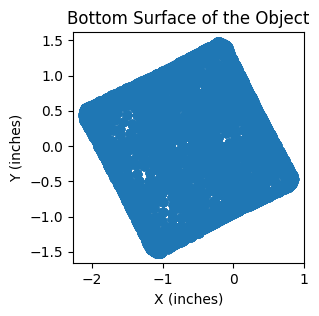

Total Object Dimensions - Length: 7.5745000000000005 cm, Width: 7.611699999999999  cm , Height: 5.793900000000001 cm
Bottom Surface Dimensions - Length: 2.9820882245000004,inch Width: 2.9931512226 inch
1239 3768
(1847, 4661)
050_medium_clamp


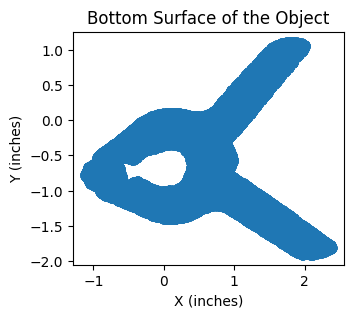

Total Object Dimensions - Length: 8.8926 cm, Width: 7.678399999999999  cm , Height: 2.6056 cm
Bottom Surface Dimensions - Length: 3.5010255126,inch Width: 3.0229937583999997 inch
1188 3761
(1857, 4661)
065-e_cups


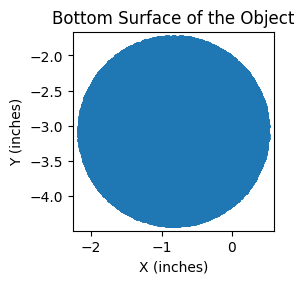

Total Object Dimensions - Length: 7.5543 cm, Width: 7.527400000000001  cm , Height: 7.077799999999999 cm
Bottom Surface Dimensions - Length: 2.5964974651000006,inch Width: 2.5868124205 inch
1261 3862
(1825, 4661)
002_master_chef_can


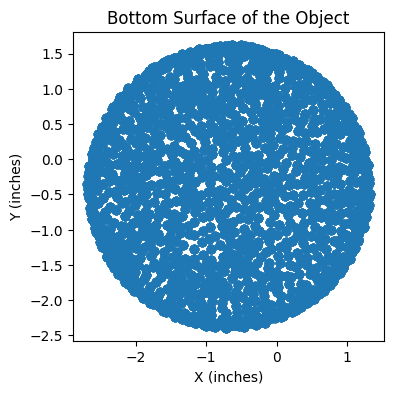

Total Object Dimensions - Length: 10.2529 cm, Width: 10.2377  cm , Height: 14.0177 cm
Bottom Surface Dimensions - Length: 4.0122856312,inch Width: 4.0111832684 inch
1129 3533
(1857, 4661)
065-d_cups


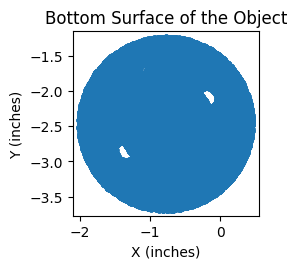

Total Object Dimensions - Length: 7.0689 cm, Width: 7.070299999999999  cm , Height: 6.892999999999999 cm
Bottom Surface Dimensions - Length: 2.3955918448,inch Width: 2.3925209769999998 inch
1273 3907
(1813, 4662)
057_racquetball


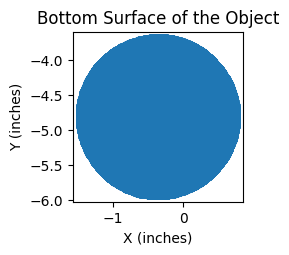

Total Object Dimensions - Length: 5.5778 cm, Width: 5.605600000000001  cm , Height: 5.5573999999999995 cm
Bottom Surface Dimensions - Length: 2.1959854378,inch Width: 2.2069303256000006 inch
1285 3950
(1802, 4662)
055_baseball


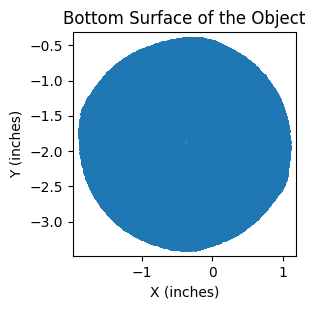

Total Object Dimensions - Length: 7.3078 cm, Width: 7.3712  cm , Height: 7.2563 cm
Bottom Surface Dimensions - Length: 2.8770881678,inch Width: 2.9020488112000002 inch
1245 3789
(1841, 4661)
041_small_marker
073-h_lego_duplo
014_lemon


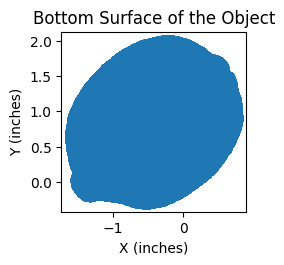

Total Object Dimensions - Length: 6.058800000000001 cm, Width: 5.929900000000001  cm , Height: 5.3017 cm
Bottom Surface Dimensions - Length: 2.3853556188000002,inch Width: 2.3346075599000002 inch
1291 3920
(1795, 4661)
070-a_colored_wood_blocks


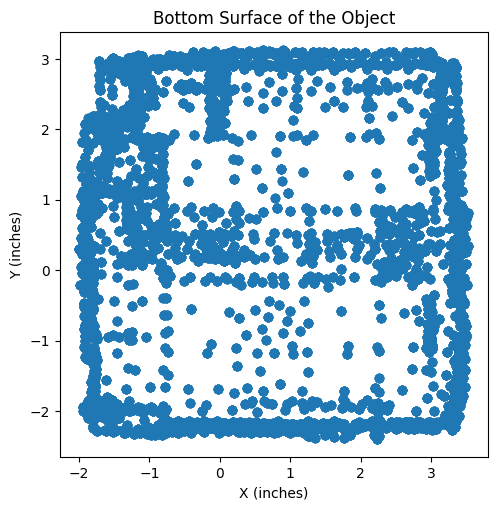

Total Object Dimensions - Length: 14.2097 cm, Width: 14.1175  cm , Height: 16.5379 cm
Bottom Surface Dimensions - Length: 5.521262824,inch Width: 5.5147667575 inch
973 3186
(1837, 4662)
073-i_lego_duplo
073-j_lego_duplo
032_knife


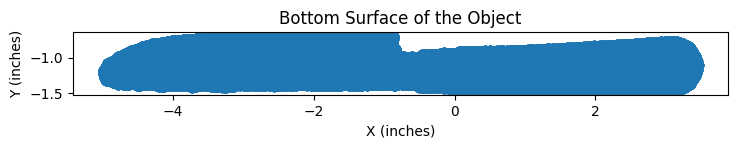

Total Object Dimensions - Length: 21.483 cm, Width: 2.0605  cm , Height: 2.2614 cm
Bottom Surface Dimensions - Length: 8.457878583000001,inch Width: 0.8112209105000001 inch
612 4272
(1857, 4661)
072-d_toy_airplane


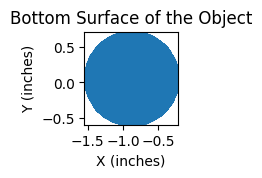

Total Object Dimensions - Length: 3.0671999999999997 cm, Width: 3.0716  cm , Height: 6.6411999999999995 cm
Bottom Surface Dimensions - Length: 1.2075597072,inch Width: 1.2092919916 inch
1324 4180
(1762, 4661)
065-j_cups


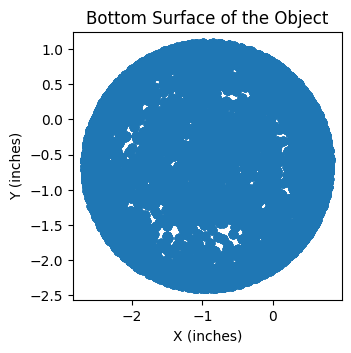

Total Object Dimensions - Length: 10.240300000000001 cm, Width: 10.2995  cm , Height: 7.5489 cm
Bottom Surface Dimensions - Length: 3.4700018738,inch Width: 3.4770491217000004 inch
1192 3656
(1857, 4661)
012_strawberry


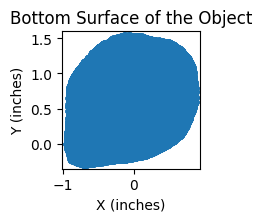

Total Object Dimensions - Length: 4.5224 cm, Width: 4.5286  cm , Height: 4.5675 cm
Bottom Surface Dimensions - Length: 1.7804734024,inch Width: 1.7829143486 inch
1324 4048
(1762, 4662)
035_power_drill


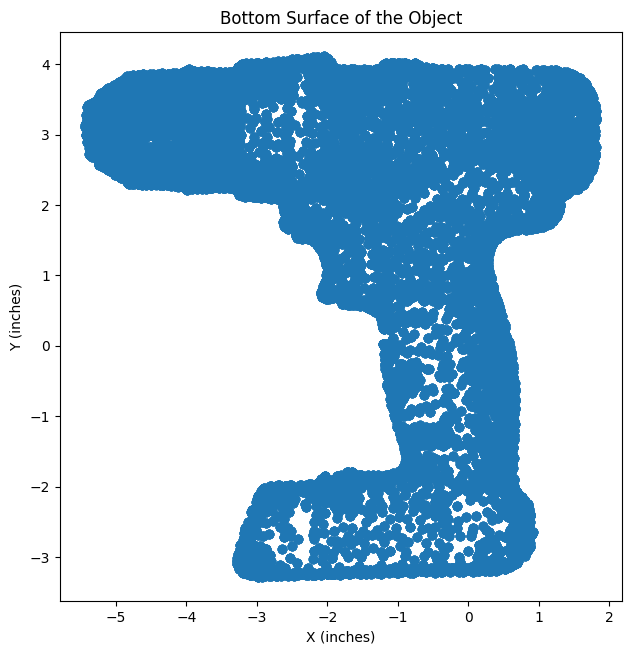

Total Object Dimensions - Length: 18.420699999999997 cm, Width: 18.7515  cm , Height: 5.7293 cm
Bottom Surface Dimensions - Length: 7.2522480107,inch Width: 7.3824843015 inch
772 2754
(1837, 4661)
073-e_lego_duplo


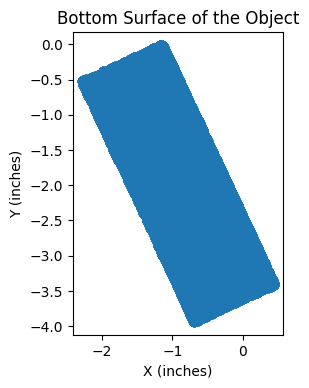

Total Object Dimensions - Length: 6.893199999999999 cm, Width: 9.9809  cm , Height: 4.3186 cm
Bottom Surface Dimensions - Length: 2.7138597331999996,inch Width: 3.9294903109000003 inch
1254 3552
(1831, 4662)
072-b_toy_airplane


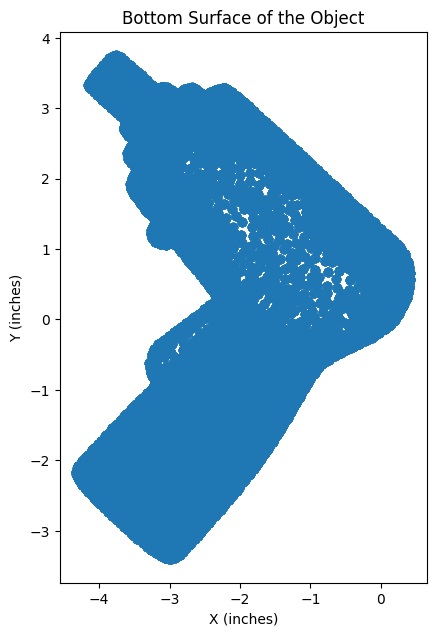

Total Object Dimensions - Length: 12.0329 cm, Width: 18.1678  cm , Height: 5.928 cm
Bottom Surface Dimensions - Length: 4.7373647629,inch Width: 7.152681027800001 inch
1064 2807
(1837, 4661)
049_small_clamp
040_large_marker


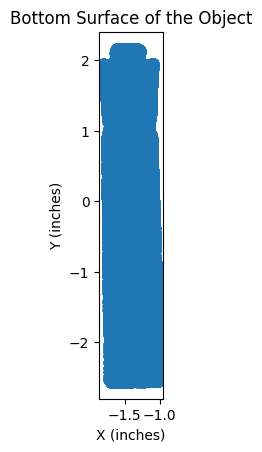

Total Object Dimensions - Length: 2.1022 cm, Width: 12.0969  cm , Height: 1.8895 cm
Bottom Surface Dimensions - Length: 0.8276382421999999,inch Width: 4.7625616269 inch
1324 3360
(1762, 4662)
073-b_lego_duplo


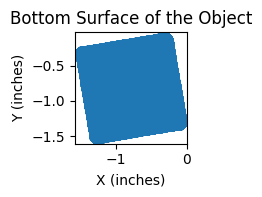

Total Object Dimensions - Length: 3.6887999999999996 cm, Width: 3.6759  cm , Height: 4.3316 cm
Bottom Surface Dimensions - Length: 1.4522842487999998,inch Width: 1.4472055059 inch
1324 4125
(1762, 4661)
065-g_cups


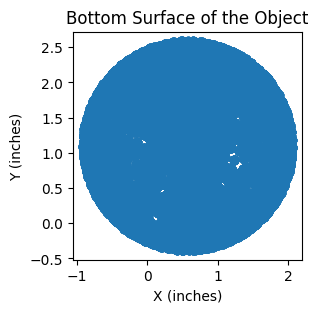

Total Object Dimensions - Length: 8.6818 cm, Width: 8.7671  cm , Height: 7.3964 cm
Bottom Surface Dimensions - Length: 2.9628362456,inch Width: 2.9627575054 inch
1240 3775
(1846, 4661)
070-b_colored_wood_blocks


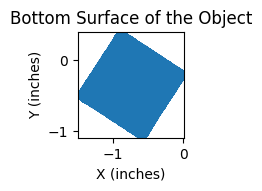

Total Object Dimensions - Length: 3.4929 cm, Width: 3.4932  cm , Height: 2.5846999999999998 cm
Bottom Surface Dimensions - Length: 1.3751582229000001,inch Width: 1.3752763332 inch
1324 4142
(1762, 4662)
073-g_lego_duplo


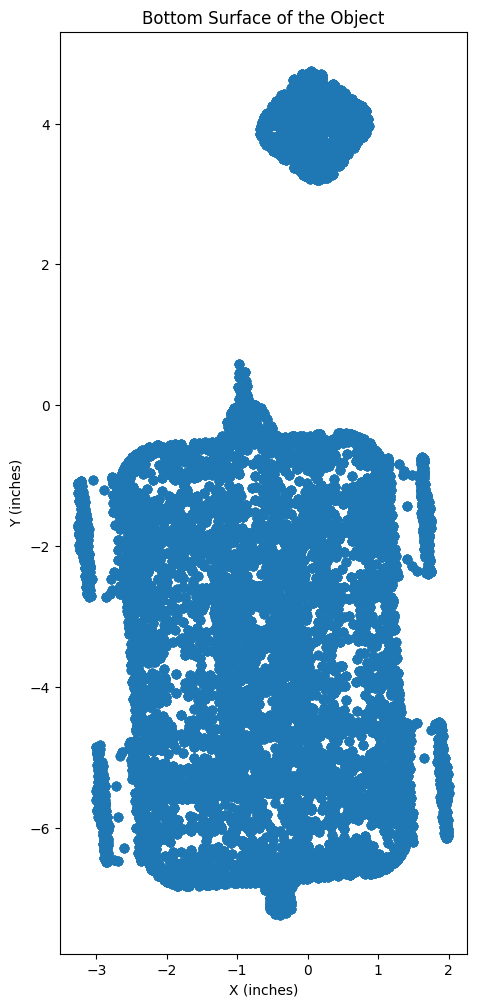

Total Object Dimensions - Length: 13.3616 cm, Width: 30.408600000000003  cm , Height: 5.9998000000000005 cm
Bottom Surface Dimensions - Length: 5.2604752816,inch Width: 11.9718962286 inch
1003 1694
(1836, 4661)
025_mug


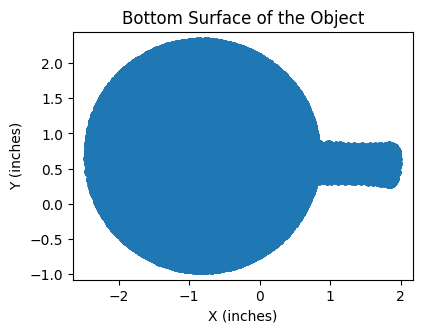

Total Object Dimensions - Length: 11.698400000000001 cm, Width: 9.3131  cm , Height: 8.1303 cm
Bottom Surface Dimensions - Length: 4.3863409513,inch Width: 3.2215371726999997 inch
1085 3715
(1856, 4661)
072-k_toy_airplane
053_mini_soccer_ball


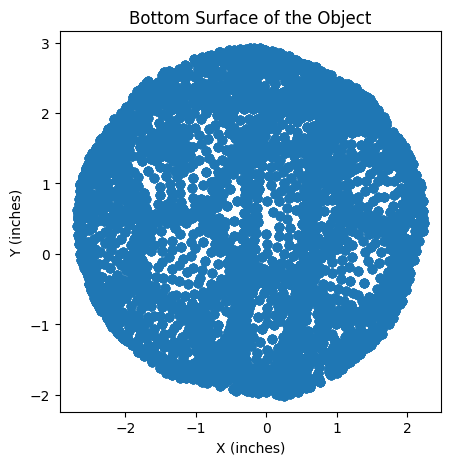

Total Object Dimensions - Length: 12.8057 cm, Width: 12.783700000000001  cm , Height: 12.5587 cm
Bottom Surface Dimensions - Length: 4.9237821864,inch Width: 4.9387821945 inch
1043 3319
(1837, 4662)
065-i_cups


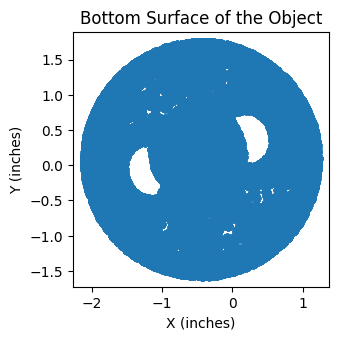

Total Object Dimensions - Length: 9.8168 cm, Width: 9.7972  cm , Height: 7.5554 cm
Bottom Surface Dimensions - Length: 3.3100411575,inch Width: 3.3094112359 inch
1210 3695
(1856, 4661)
071_nine_hole_peg_test


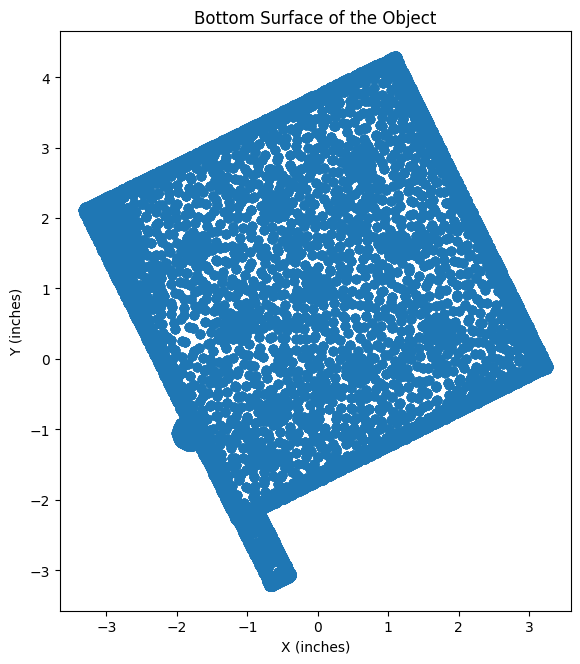

Total Object Dimensions - Length: 16.752899999999997 cm, Width: 19.1112  cm , Height: 4.067699999999999 cm
Bottom Surface Dimensions - Length: 6.595633482899999,inch Width: 7.524098551200001 inch
848 2722
(1837, 4662)
006_mustard_bottle


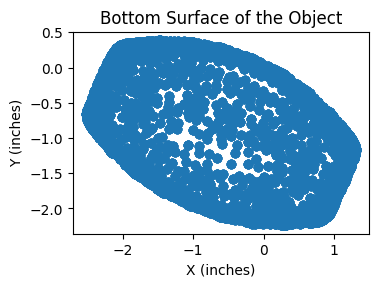

Total Object Dimensions - Length: 9.7198 cm, Width: 6.6621  cm , Height: 19.1301 cm
Bottom Surface Dimensions - Length: 3.8266949797999996,inch Width: 2.6228754321 inch
1150 3854
(1856, 4662)
073-c_lego_duplo


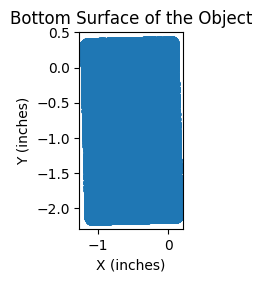

Total Object Dimensions - Length: 3.3895999999999997 cm, Width: 6.4821  cm , Height: 2.3716999999999997 cm
Bottom Surface Dimensions - Length: 1.3344889095999999,inch Width: 2.5520092521000004 inch
1324 3870
(1762, 4661)
059_chain


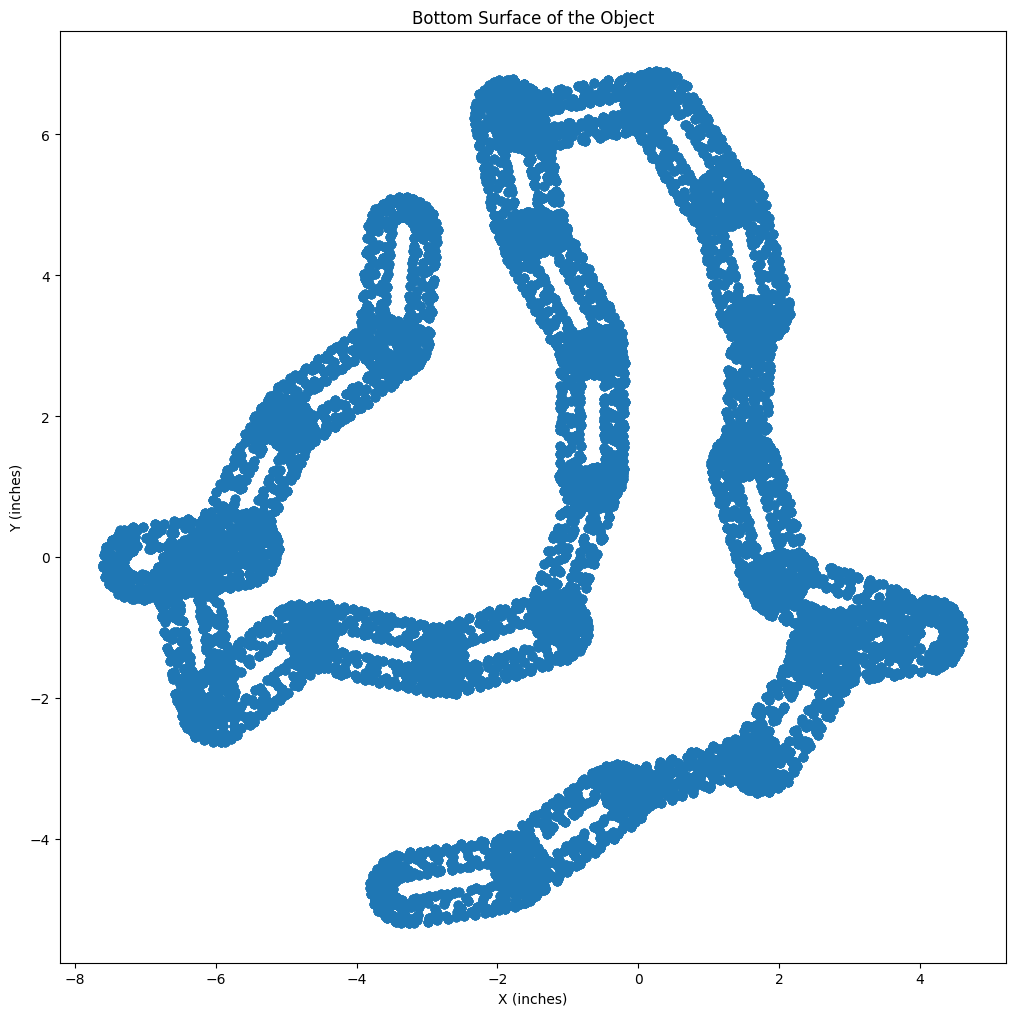

Total Object Dimensions - Length: 31.031100000000002 cm, Width: 30.718500000000006  cm , Height: 2.4756 cm
Bottom Surface Dimensions - Length: 12.216975101100001,inch Width: 12.093904168500002 inch
195 1666
(1837, 4662)
038_padlock


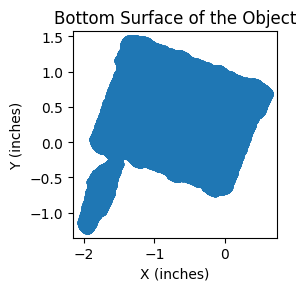

Total Object Dimensions - Length: 6.6973 cm, Width: 6.8055  cm , Height: 2.9140999999999995 cm
Bottom Surface Dimensions - Length: 2.6367337073000003,inch Width: 2.6793321555 inch
1259 3841
(1827, 4662)
063-c_marbles
026_sponge


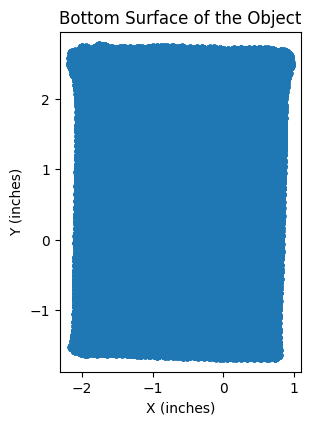

Total Object Dimensions - Length: 7.9147 cm, Width: 11.2113  cm , Height: 1.9007 cm
Bottom Surface Dimensions - Length: 3.1160253047,inch Width: 4.4139000213 inch
1251 3440
(1835, 4661)
009_gelatin_box


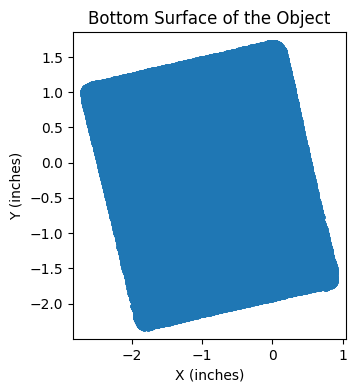

Total Object Dimensions - Length: 8.9404 cm, Width: 10.110800000000001  cm , Height: 3.0074 cm
Bottom Surface Dimensions - Length: 3.5198444204,inch Width: 3.9806320708 inch
1183 3540
(1854, 4661)
043_phillips_screwdriver


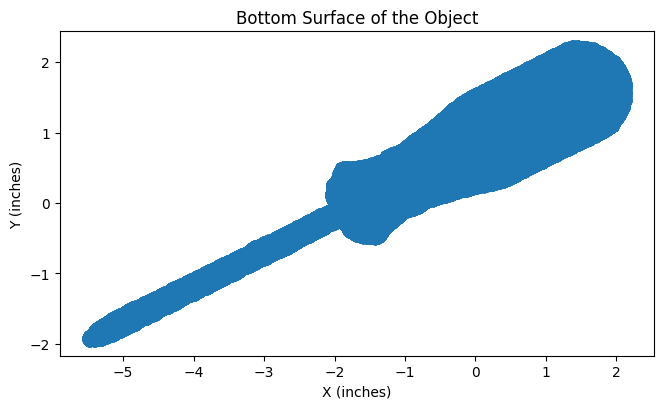

Total Object Dimensions - Length: 19.4858 cm, Width: 10.6967  cm , Height: 3.5515 cm
Bottom Surface Dimensions - Length: 7.6715789458,inch Width: 4.2113014867 inch
723 3487
(1837, 4662)
010_potted_meat_can


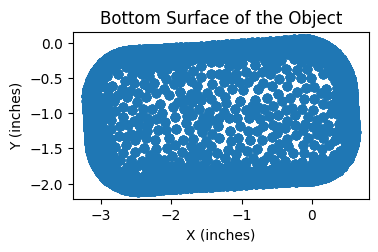

Total Object Dimensions - Length: 10.208499999999999 cm, Width: 6.0103  cm , Height: 8.354299999999999 cm
Bottom Surface Dimensions - Length: 3.8201201731000003,inch Width: 2.1675208555 inch
1151 3959
(1857, 4662)
063-a_marbles


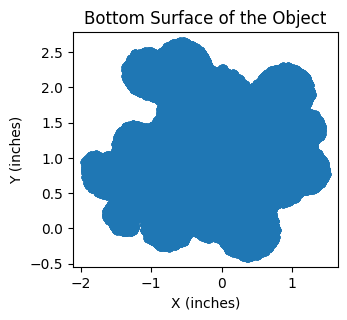

Total Object Dimensions - Length: 8.680299999999999 cm, Width: 7.7363  cm , Height: 7.1511000000000005 cm
Bottom Surface Dimensions - Length: 3.4174427902999995,inch Width: 3.0457890463 inch
1198 3756
(1857, 4661)
065-a_cups


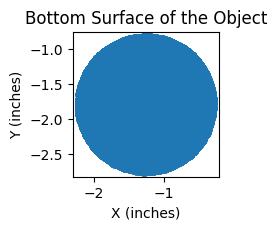

Total Object Dimensions - Length: 5.708600000000001 cm, Width: 5.7425  cm , Height: 6.151599999999999 cm
Bottom Surface Dimensions - Length: 1.8796466842999997,inch Width: 1.8789773926000002 inch
1303 4026
(1783, 4662)
051_large_clamp


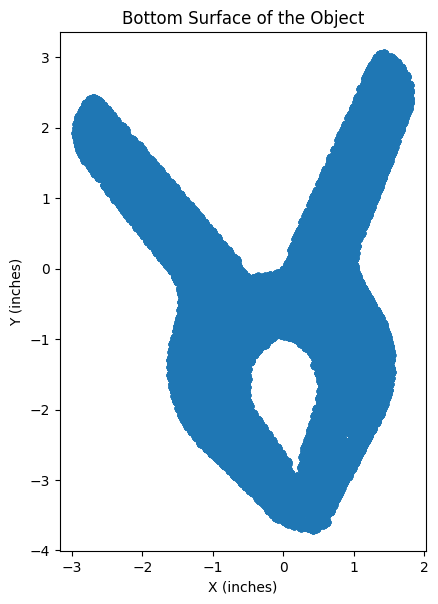

Total Object Dimensions - Length: 12.004100000000001 cm, Width: 17.107400000000002  cm , Height: 3.9172 cm
Bottom Surface Dimensions - Length: 4.7260261741,inch Width: 6.7352004874 inch
1061 2904
(1832, 4662)
073-d_lego_duplo


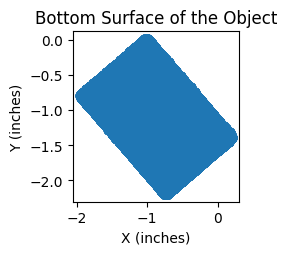

Total Object Dimensions - Length: 5.448899999999999 cm, Width: 5.6186  cm , Height: 4.3138 cm
Bottom Surface Dimensions - Length: 2.1452373788999997,inch Width: 2.2120484386 inch
1288 3949
(1799, 4662)
029_plate


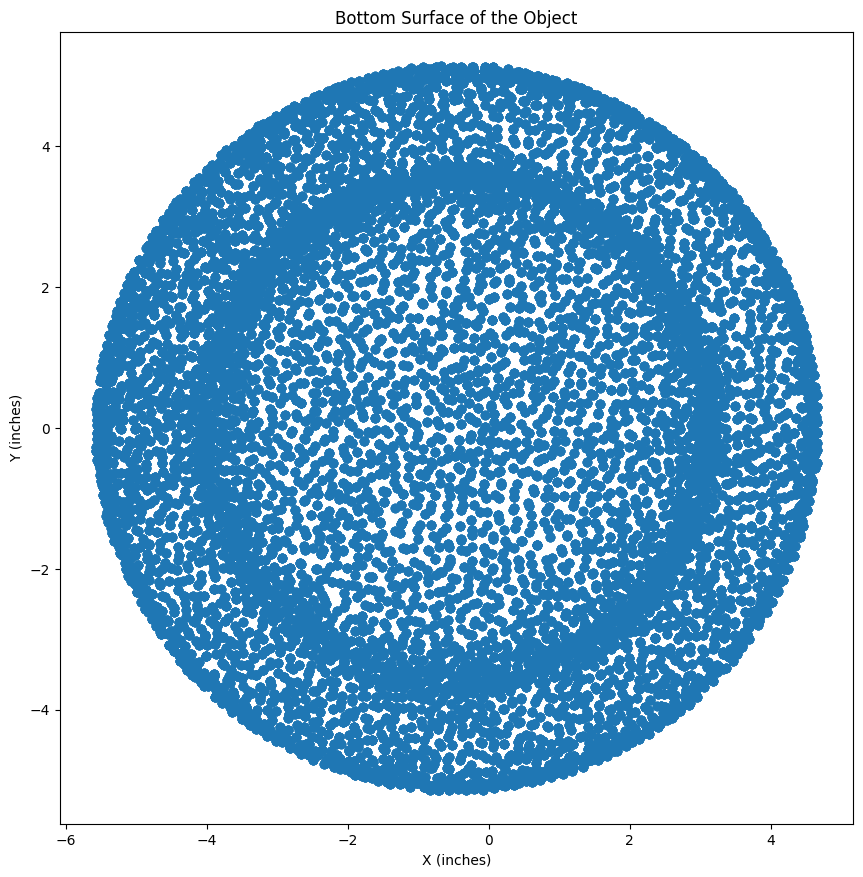

Total Object Dimensions - Length: 26.015 cm, Width: 26.1102  cm , Height: 2.6723 cm
Bottom Surface Dimensions - Length: 10.242131515,inch Width: 10.2796118502 inch
424 2085
(1836, 4661)
022_windex_bottle


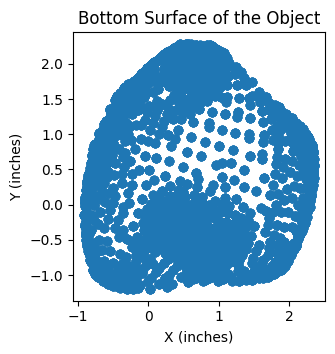

Total Object Dimensions - Length: 8.2727 cm, Width: 9.5428  cm , Height: 26.9801 cm
Bottom Surface Dimensions - Length: 3.2569702627,inch Width: 3.4860255045 inch
1216 3654
(1856, 4661)
072-c_toy_airplane


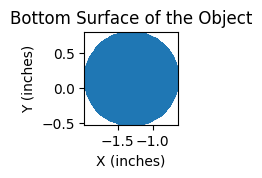

Total Object Dimensions - Length: 3.0651 cm, Width: 3.0643000000000002  cm , Height: 6.6722 cm
Bottom Surface Dimensions - Length: 1.2067329351,inch Width: 1.2064179743 inch
1324 4181
(1762, 4662)
065-b_cups


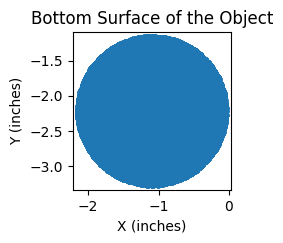

Total Object Dimensions - Length: 6.0959 cm, Width: 6.0944  cm , Height: 6.3965 cm
Bottom Surface Dimensions - Length: 2.0374814152,inch Width: 2.046064097 inch
1294 3987
(1793, 4661)
024_bowl


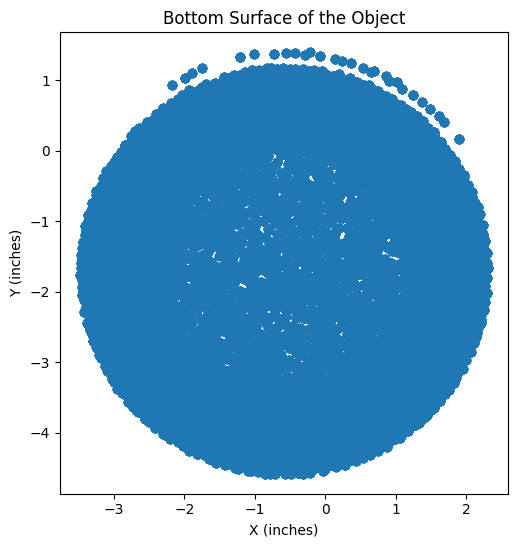

Total Object Dimensions - Length: 16.146300000000004 cm, Width: 16.1164  cm , Height: 5.500900000000001 cm
Bottom Surface Dimensions - Length: 5.7821291066,inch Width: 5.9922079602 inch
943 3075
(1837, 4661)
028_skillet_lid


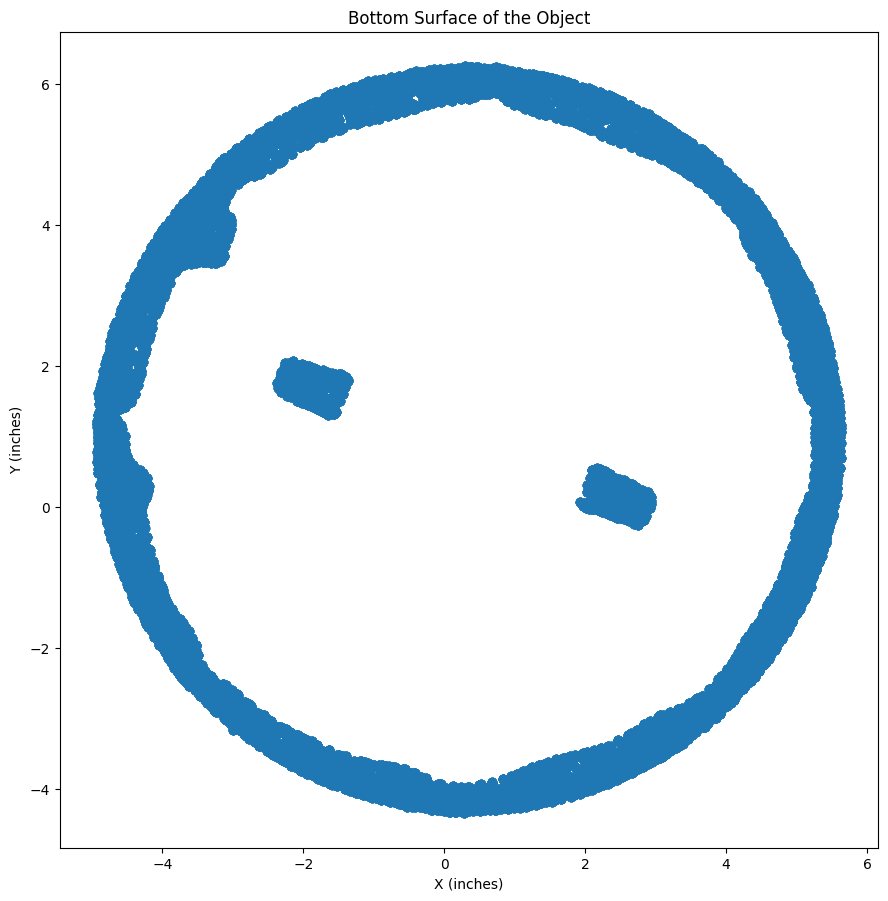

Total Object Dimensions - Length: 26.8264 cm, Width: 26.9153  cm , Height: 7.6055 cm
Bottom Surface Dimensions - Length: 10.5615805064,inch Width: 10.596580525299998 inch
387 2012
(1837, 4662)
019_pitcher_base


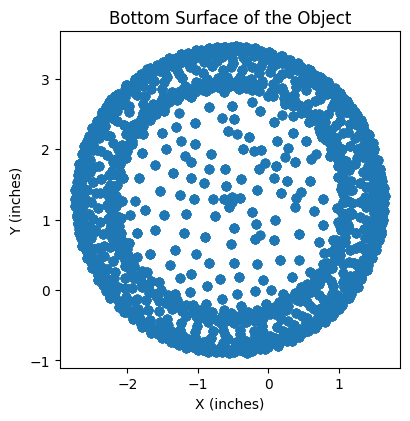

Total Object Dimensions - Length: 14.9134 cm, Width: 14.482899999999999  cm , Height: 24.238699999999998 cm
Bottom Surface Dimensions - Length: 4.3900023706,inch Width: 4.366537791000001 inch
1105 3451
(1837, 4662)
016_pear


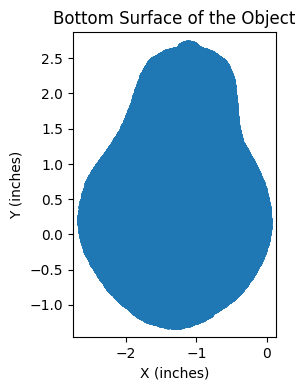

Total Object Dimensions - Length: 6.654599999999999 cm, Width: 10.0455  cm , Height: 6.5663 cm
Bottom Surface Dimensions - Length: 2.6199226745999997,inch Width: 3.9549233955000003 inch
1260 3546
(1826, 4661)
004_sugar_box


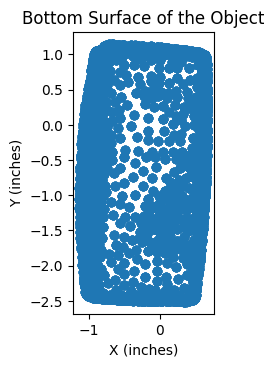

Total Object Dimensions - Length: 4.9496 cm, Width: 9.4162  cm , Height: 17.6015 cm
Bottom Surface Dimensions - Length: 1.8190561004,inch Width: 3.6572854395000003 inch
1307 3615
(1780, 4662)
072-i_toy_airplane
013_apple


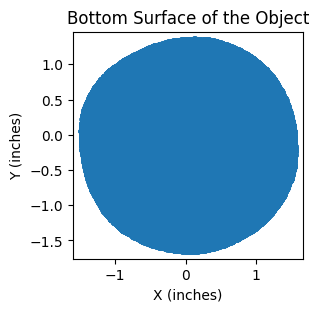

Total Object Dimensions - Length: 7.5448 cm, Width: 7.487099999999999  cm , Height: 7.188900000000001 cm
Bottom Surface Dimensions - Length: 2.9703953048000002,inch Width: 2.9476787571 inch
1240 3779
(1847, 4662)
036_wood_block


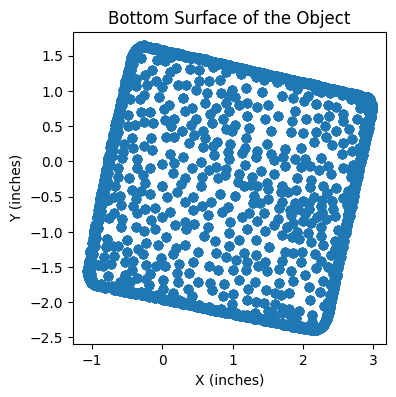

Total Object Dimensions - Length: 10.3917 cm, Width: 10.3464  cm , Height: 20.6003 cm
Bottom Surface Dimensions - Length: 4.045632105899999,inch Width: 4.0480730521 inch
1125 3525
(1857, 4662)
072-a_toy_airplane


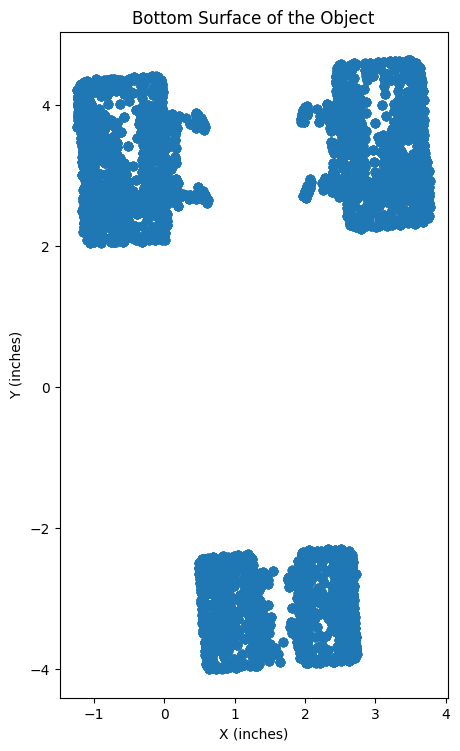

Total Object Dimensions - Length: 25.518399999999996 cm, Width: 26.2932  cm , Height: 18.343799999999998 cm
Bottom Surface Dimensions - Length: 5.0067743572,inch Width: 8.648823568 inch
1029 2462
(1833, 4662)
072-e_toy_airplane


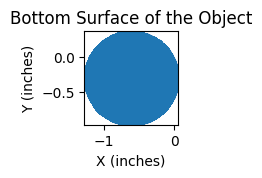

Total Object Dimensions - Length: 3.0758 cm, Width: 3.0784  cm , Height: 6.6156999999999995 cm
Bottom Surface Dimensions - Length: 1.2109455358,inch Width: 1.2119691584 inch
1324 4180
(1762, 4662)
005_tomato_soup_can


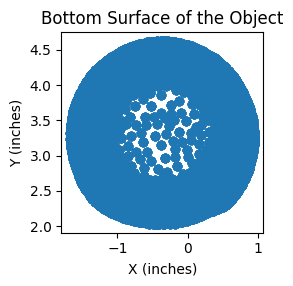

Total Object Dimensions - Length: 6.7911 cm, Width: 6.7743  cm , Height: 10.1855 cm
Bottom Surface Dimensions - Length: 2.6099620392999996,inch Width: 2.6025210904 inch
1278 3858
(1808, 4661)
072-g_toy_airplane
056_tennis_ball


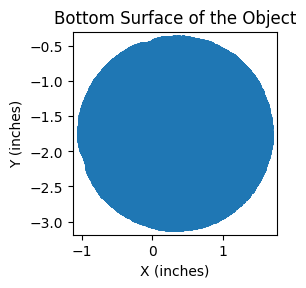

Total Object Dimensions - Length: 6.697500000000001 cm, Width: 6.703  cm , Height: 6.645700000000001 cm
Bottom Surface Dimensions - Length: 2.6368124475,inch Width: 2.6389778030000004 inch
1259 3850
(1827, 4661)
062_dice


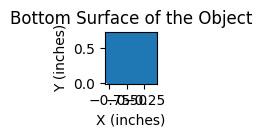

Total Object Dimensions - Length: 1.7158 cm, Width: 1.7079  cm , Height: 1.7554 cm
Bottom Surface Dimensions - Length: 0.6755121758,inch Width: 0.6724019379 inch
1324 4304
(1762, 4661)
007_tuna_fish_can


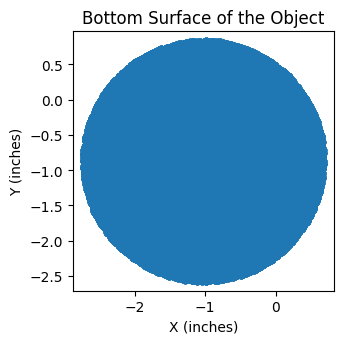

Total Object Dimensions - Length: 8.5559 cm, Width: 8.554  cm , Height: 3.3537999999999997 cm
Bottom Surface Dimensions - Length: 3.3684663858999997,inch Width: 3.3677183540000004 inch
1203 3682
(1856, 4662)
073-f_lego_duplo


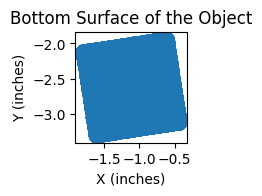

Total Object Dimensions - Length: 3.6605 cm, Width: 3.6684  cm , Height: 4.342199999999999 cm
Bottom Surface Dimensions - Length: 1.4411425105,inch Width: 1.4442527484 inch
1324 4126
(1762, 4661)
072-f_toy_airplane
046_plastic_bolt
061_foam_brick


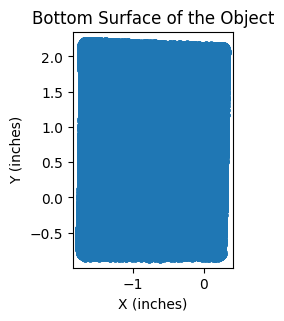

Total Object Dimensions - Length: 5.255999999999999 cm, Width: 7.7874  cm , Height: 5.1193 cm
Bottom Surface Dimensions - Length: 2.069292456,inch Width: 3.0659071674 inch
1292 3751
(1794, 4661)
039_key
065-f_cups


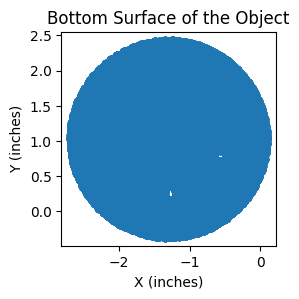

Total Object Dimensions - Length: 8.074 cm, Width: 8.0872  cm , Height: 7.2177999999999995 cm
Bottom Surface Dimensions - Length: 2.7658282651999997,inch Width: 2.7744896872000004 inch
1269 3819
(1817, 4662)
065-h_cups


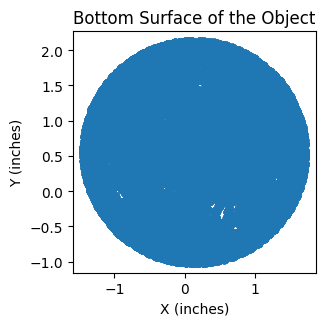

Total Object Dimensions - Length: 9.1495 cm, Width: 9.1616  cm , Height: 7.5063 cm
Bottom Surface Dimensions - Length: 3.1303560211,inch Width: 3.1346079919 inch
1230 3736
(1855, 4662)
031_spoon


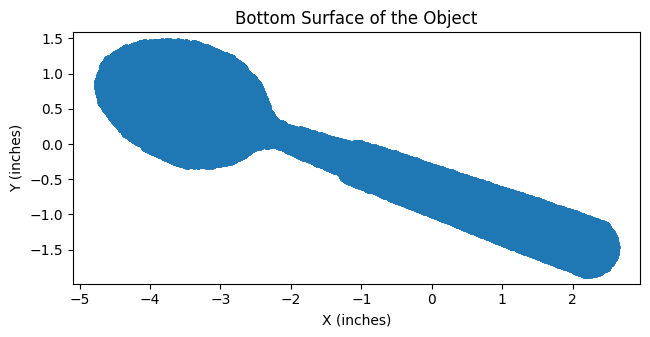

Total Object Dimensions - Length: 18.596 cm, Width: 8.2929  cm , Height: 2.0892 cm
Bottom Surface Dimensions - Length: 7.321263796000001,inch Width: 3.2649230229 inch
744 3705
(1857, 4661)
042_adjustable_wrench


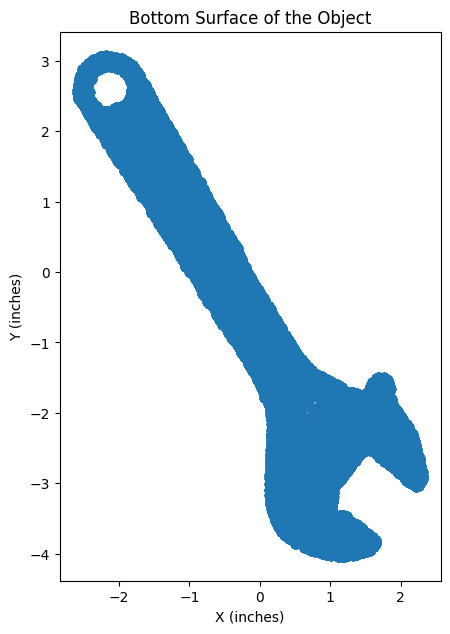

Total Object Dimensions - Length: 12.479899999999999 cm, Width: 18.1093  cm , Height: 1.4654 cm
Bottom Surface Dimensions - Length: 4.9133491098999995,inch Width: 7.1296495193 inch
1044 2813
(1837, 4662)
044_flat_screwdriver


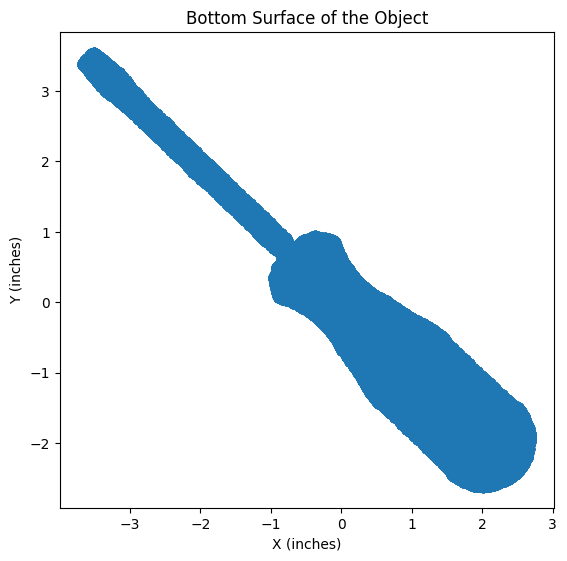

Total Object Dimensions - Length: 16.187099999999997 cm, Width: 15.6885  cm , Height: 3.5040999999999998 cm
Bottom Surface Dimensions - Length: 6.3728774570999995,inch Width: 6.1765781385 inch
869 3033
(1832, 4662)
065-c_cups


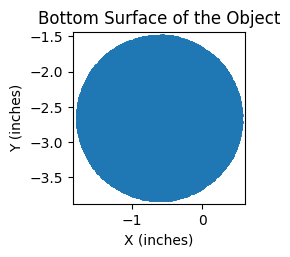

Total Object Dimensions - Length: 6.497400000000001 cm, Width: 6.510300000000001  cm , Height: 6.655599999999999 cm
Bottom Surface Dimensions - Length: 2.2252767922000003,inch Width: 2.2296468733 inch
1283 3945
(1803, 4662)
008_pudding_box


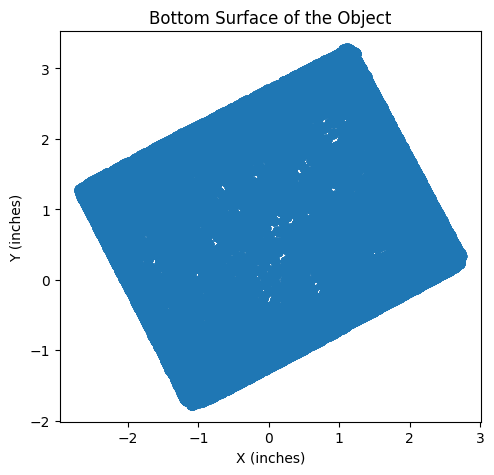

Total Object Dimensions - Length: 13.793800000000001 cm, Width: 12.8756  cm , Height: 3.8889 cm
Bottom Surface Dimensions - Length: 5.430632853800001,inch Width: 5.069136595600001 inch
978 3289
(1831, 4662)
047_plastic_nut
033_spatula


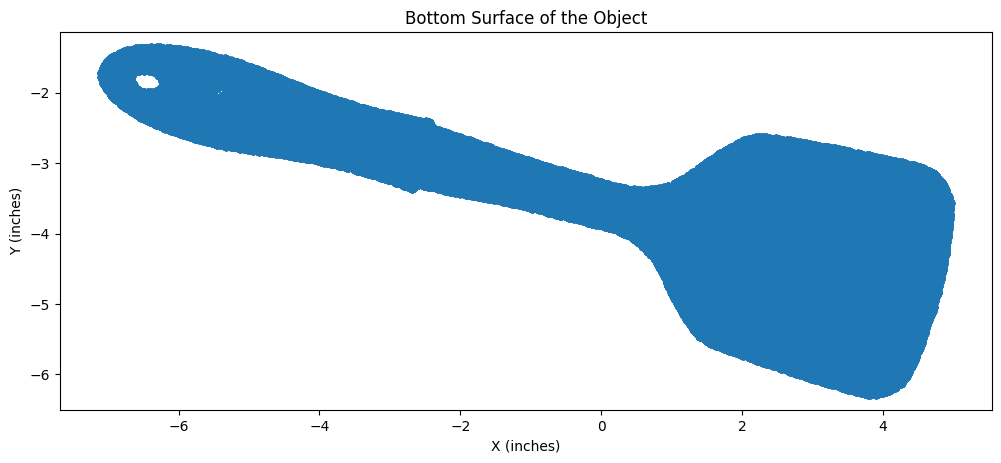

Total Object Dimensions - Length: 30.552199999999996 cm, Width: 12.459399999999999  cm , Height: 3.2933000000000003 cm
Bottom Surface Dimensions - Length: 12.028431692199998,inch Width: 4.905278239399999 inch
217 3327
(1837, 4662)
072-j_toy_airplane
072-h_toy_airplane
011_banana


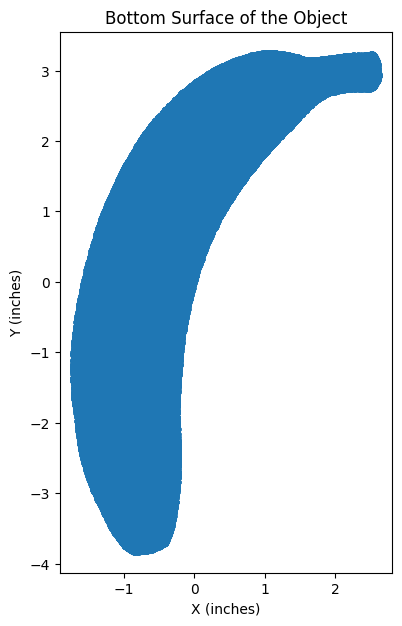

Total Object Dimensions - Length: 10.894200000000001 cm, Width: 17.8447  cm , Height: 3.6739999999999995 cm
Bottom Surface Dimensions - Length: 4.2890574342,inch Width: 7.0254762347 inch
1116 2837
(1837, 4662)
017_orange


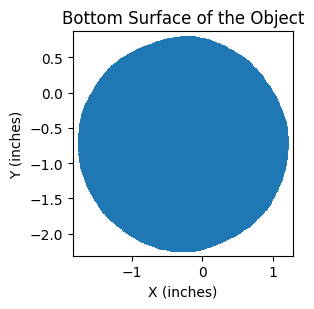

Total Object Dimensions - Length: 7.2158 cm, Width: 7.3986  cm , Height: 7.1352 cm
Bottom Surface Dimensions - Length: 2.8408676758,inch Width: 2.9128362186 inch
1247 3787
(1839, 4662)
076_timer
063-b_marbles


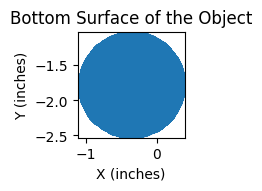

Total Object Dimensions - Length: 3.5014 cm, Width: 3.503199999999999  cm , Height: 3.4488 cm
Bottom Surface Dimensions - Length: 1.3785046814,inch Width: 1.3792133431999998 inch
1324 4141
(1762, 4661)
073-k_lego_duplo
073-l_lego_duplo
048_hammer


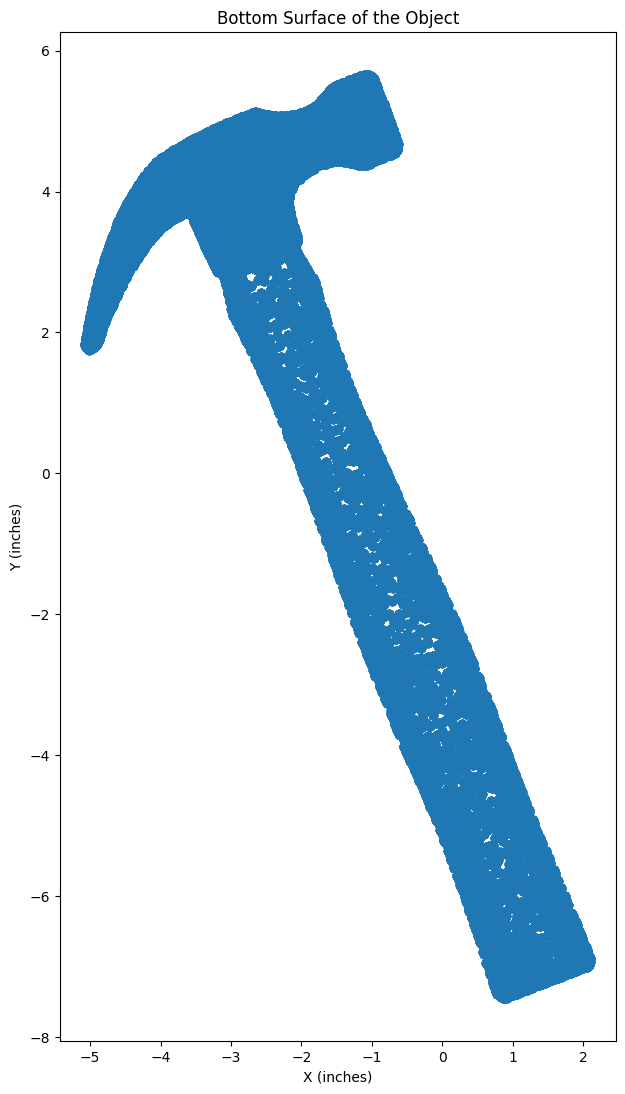

Total Object Dimensions - Length: 18.22 cm, Width: 33.2722  cm , Height: 3.2862 cm
Bottom Surface Dimensions - Length: 7.17323222,inch Width: 13.0992984122 inch
781 1434
(1837, 4662)


In [11]:
import cv2
import pywavefront
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
from PIL import Image, ImageDraw, ImageFont
import io
import os


# Constants
MARKER_ID = 6
# Replace with your specific 3D object file path from google_16k in YCB models 
# FILE_PATH = '/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/003_cracker_box/google_16k/textured.obj'
# Save the Arimo zip file on your system and replace the FONT_PATH with yours 
FONT_PATH = "/home/jose/Downloads/Arimo/Arimo-VariableFont_wght.ttf"
# Change the output folder according to your wish.
# OUTPUT_PDF_PATH = f'/home/jose/Downloads/templates/{os.path.basename(os.path.dirname(os.path.dirname(FILE_PATH)))}.pdf'
FONT_SIZE = 30  # Adjust the size as needed
# New Constants for Font Sizes
TITLE_FONT_SIZE = 40
ANNOTATION_FONT_SIZE = 30
AXES_FONT_SIZE = 30
DISTANCE_CAPTION_FONT_SIZE = 40

PLOT_DPI = 300

# Parameterized values
ARUCO_SIZE = 500  # The size of the ARUCO marke
ARUCO_DICT = cv2.aruco.DICT_4X4_250  # The ARUCO dictionary

# Both for changing plot's position 
PLOT_X_OFFSET = -34  # The offset for the plot's x-position
PLOT_Y_OFFSET = -250  # The offset for the plot's y-position

# Both for changing Marker's position 
MARKER_X_OFFSET = 922  # The offset for the marker's x-position
MARKER_Y_POS = 0  # The y-position of the marker

# Both for changing Black lines's position 
INTERSECTION_X_OFFSET = 400  # The offset for the intersection's x-position
INTERSECTION_Y_OFFSET = 1100  # The offset for the intersection's y-position

X_RANGE = 0.210
Y_RANGE = 0.297
INTERVAL_VALUE = 20
X_AXIS_TEXT_COORDS = (1700, 3000)
Y_AXIS_TEXT_COORDS = (2100, 200)
# Constants for title position
TITLE_X_POS = 200
TITLE_Y_POS = 3150  # Or just calculate the exact position you want


# Additional Constants for annotation positions and increments
ANNOTATION_START_X = 200
ANNOTATION_START_Y = 3200
ANNOTATION_LINE_SPACING = 30

def find_inersection_point(image):
    # Convert to RGB (OpenCV uses BGR by default)
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define range of red and green colors in RGB
    lower_red = np.array([100, 0, 0])
    upper_red = np.array([255, 100, 100])
    lower_green = np.array([0, 100, 0])  # Adjust these values based on your actual green
    upper_green = np.array([100, 255, 100])  
    
    # Threshold the RGB image to get only red and green colors
    mask_red = cv2.inRange(image, lower_red, upper_red)
    mask_green = cv2.inRange(image, lower_green, upper_green)
    
    # Find contours for the red and green lines
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if contours are found, if not, print an error message
    if not contours_red or not contours_green:
        print("No contours found for red or green lines. Check the color thresholds and make sure the lines are visible in the image.")
 

    else:
        # Assume the longest contour in each color is the line we want
        red_line = max(contours_red, key=cv2.contourArea)
        green_line = max(contours_green, key=cv2.contourArea)
    
        # Find the endpoints of each line
        red_line_endpoint = tuple(red_line[red_line[:, :, 0].argmin()][0])
        green_line_endpoint = tuple(green_line[green_line[:, :, 0].argmin()][0])
    
        # Now, we find the point closest between the two lines
        # For simplicity, we are assuming that they join at the ends closest to the origin (0,0)
        joint_point = (max(red_line_endpoint[0], green_line_endpoint[0]), max(red_line_endpoint[1], green_line_endpoint[1]))
    
        # Draw a black circle at the joint point
        cv2.circle(image, joint_point, 200, (0,0,0), 2)  # Circle with a thickness of 2 pixels
    
        # Convert joint point to inches
        scaling_factor_x = 11.69/ image.shape[1]
        scaling_factor_y = 16.54 / image.shape[0]
    
        real_world_x = joint_point[0] * scaling_factor_x
        real_world_y = (image.shape[0] - joint_point[1]) * scaling_factor_y  # Convert y-coordinate because image origin (0,0) is at the top-left
        # print(f"Joint point at ({joint_point[0]}, {joint_point[1]}) pixel")
        # print(f"Joint point at ({real_world_x}, {real_world_y}) inches")
    

    return image,joint_point
    
def load_mesh_model(file_path):
    scene = pywavefront.Wavefront(file_path)
    items = list(scene.materials.items())
    ver = items[0][1].vertices
    n_ver = int(len(ver)/8)
    v = np.zeros((n_ver,3))
    for i in range(n_ver):
        v[i,:] = ver[8*i+5:8*i+5+3]
    return v

def calculate_dimensions(vertices):
    x_min, x_max = np.min(vertices[:, 0]), np.max(vertices[:, 0])
    y_min, y_max = np.min(vertices[:, 1]), np.max(vertices[:, 1])
    z_min, z_max = np.min(vertices[:, 2]), np.max(vertices[:, 2])
    return x_max - x_min, y_max - y_min, z_max - z_min
    
def generate_aruco_marker(id, size=ARUCO_SIZE, dictionary=ARUCO_DICT):
    aruco_dict = cv2.aruco.Dictionary_get(dictionary)
    marker_img = cv2.aruco.drawMarker(aruco_dict, id, size)
    return marker_img

def plot_bottom_surface(vertices, z_threshold=0.05, dpi=300):
    meter_to_inch = 39.3701  # conversion factor from meters to inches

    z_min = np.min(vertices[:, 2])
    bottom_vertices = vertices[np.abs(vertices[:, 2] - z_min) <= z_threshold]
    x_min, x_max = np.min(bottom_vertices[:, 0]), np.max(bottom_vertices[:, 0])
    y_min, y_max = np.min(bottom_vertices[:, 1]), np.max(bottom_vertices[:, 1])
    
    # Convert from meters to inches
    bottom_length_inch = (x_max - x_min) * meter_to_inch
    bottom_width_inch = (y_max - y_min) * meter_to_inch

    fig, ax = plt.subplots()
    ax.scatter(bottom_vertices[:, 0] * meter_to_inch, bottom_vertices[:, 1] * meter_to_inch)
    ax.set_xlabel('X (inches)')
    ax.set_ylabel('Y (inches)')
    ax.set_title('Bottom Surface of the Object')
    ax.axis('equal')

    # Set the size of the plot to match the actual dimensions of the object's bottom surface in inches
    fig.set_size_inches(bottom_length_inch, bottom_width_inch)
    
  
    plt.show()
    
    return fig,bottom_length_inch, bottom_width_inch

def get_intersection_point():
    return 0, 0

def create_layout_with_annotations(marker_id, file_path, dpi, font_path, marker_x_offset, marker_y_pos, plot_x_offset, plot_y_offset, title_x_pos, title_y_pos, axes_text_coords, interval_value, x_range, y_range, annotation_start_x, annotation_start_y, annotation_line_spacing, annotation_font_size, title_font_size, distance_caption_font_size, intersection_x_offset, intersection_y_offset):
    # Generate ARUCO marker
    marker_img = generate_aruco_marker(marker_id)
    marker_pil_img = Image.fromarray(marker_img)
    marker_pil_img = marker_pil_img.rotate(-90, expand=1)

    # Plot object
    vertices = load_mesh_model(file_path)
    length, width, height = calculate_dimensions(vertices)
    object_name = os.path.basename(os.path.dirname(os.path.dirname(file_path)))  
    fig, bottom_length_inch, bottom_width_inch= plot_bottom_surface(vertices)
    print(f"Total Object Dimensions - Length: {length*100} cm, Width: {width*100}  cm , Height: {height*100} cm")
    print(f"Bottom Surface Dimensions - Length: {bottom_length_inch},inch Width: {bottom_width_inch} inch")

    # Save plot to PIL image
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', dpi=dpi)
    buf.seek(0)
    plot_pil_img = Image.open(buf)
    
    a3_pixel_width = int(11.69 * 300)  # width in pixels
    a3_pixel_height = int( 16.54* 300)  # height in pixels
    a3_img = Image.new('RGB', (a3_pixel_width, a3_pixel_height), (255, 255, 255))

    # Positioning the elements
    marker_x_pos = (a3_pixel_width - marker_pil_img.width) // 2 - plot_pil_img.width // 6 + marker_x_offset
    plot_x_pos = (a3_pixel_width - plot_pil_img.width) // 2 + plot_x_offset
    plot_y_pos = a3_pixel_height - plot_pil_img.height + plot_y_offset 
    print(plot_x_pos,plot_y_pos)

    # Paste elements
    a3_img.paste(marker_pil_img, (marker_x_pos, marker_y_pos))
    a3_img.paste(plot_pil_img, (plot_x_pos, plot_y_pos))

    

    # Calculate intersection point
    intersection_x, intersection_y = get_intersection_point()
    y_scale_factor = plot_pil_img.height / (max(vertices[:1000000,1]) - min(vertices[:1000000,1]))
    intersection_pixel_y = (max(vertices[:1000000, 1]) - intersection_y) * y_scale_factor

    intersection_x_a3 = plot_x_pos + plot_pil_img.width / 2 + intersection_x_offset
    intersection_y_a3 = plot_y_pos + intersection_pixel_y + intersection_y_offset

    # Draw line and text for distance caption
    draw = ImageDraw.Draw(a3_img)
    try:
        font = ImageFont.truetype(font_path, size=distance_caption_font_size)
    except OSError:
        font = ImageFont.load_default()
    draw.line([(intersection_x_a3, intersection_y_a3), (intersection_x_a3, marker_y_pos + marker_pil_img.height)], fill=(0, 0, 0))
    draw.text((intersection_x_a3 + 10, (intersection_y_a3 + marker_y_pos + marker_pil_img.height) / 2), "10 cm", font=font, fill=(0, 0, 0))

    return a3_img
    
ef find_and_crop_blue_shape(plot_img_path, lower_blue, upper_blue, dpi):
    # Load the plot image
    plot_img = cv2.imread(plot_img_path)
    plot_img_rgb = cv2.cvtColor(plot_img, cv2.COLOR_BGR2RGB)

    # Create a mask for blue color
    mask = cv2.inRange(plot_img_rgb, lower_blue, upper_blue)

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("No blue shape found")

    # Get the largest contour, assuming it's the blue shape
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)

    # Crop and resize the blue shape
    blue_shape = plot_img_rgb[y:y+h, x:x+w]
    blue_shape_pil = Image.fromarray(blue_shape)
    blue_shape_pil = blue_shape_pil.resize((int(w * dpi / 25.4), int(h * dpi / 25.4)), Image.ANTIALIAS)  # Convert mm to inches, then to pixels

    return blue_shape_pil


if __name__ == "__main__":
    # Base directory path
    base_dir = '/home/jose/Downloads/GraspBenchmarkWorkspace/YCB/models/ycb/'
    # List all directories in the base path
    model_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    # Construct the file path for each model
    for model_dir in model_dirs:
        print(model_dir)
        FILE_PATH = os.path.join(base_dir, model_dir, 'google_16k', 'textured.obj')
        OUTPUT_PDF_PATH = f'/home/jose/Downloads/templates/{os.path.basename(os.path.dirname(os.path.dirname(FILE_PATH)))}.pdf'
        if os.path.isfile(FILE_PATH):
            a3_img = create_layout_with_annotations(MARKER_ID, FILE_PATH, PLOT_DPI, FONT_PATH, MARKER_X_OFFSET, MARKER_Y_POS, PLOT_X_OFFSET, PLOT_Y_OFFSET, TITLE_X_POS, TITLE_Y_POS, (X_AXIS_TEXT_COORDS, Y_AXIS_TEXT_COORDS), INTERVAL_VALUE, X_RANGE, Y_RANGE, ANNOTATION_START_X, ANNOTATION_START_Y, ANNOTATION_LINE_SPACING, ANNOTATION_FONT_SIZE, TITLE_FONT_SIZE, DISTANCE_CAPTION_FONT_SIZE, INTERSECTION_X_OFFSET, INTERSECTION_Y_OFFSET)
            output_pdf_path = OUTPUT_PDF_PATH
            if isinstance(a3_img, Image.Image):
                a3_img_rgb = a3_img.convert('RGB')
                image_np = np.array(a3_img_rgb)
                new_a3_img,intersection_points = find_inersection_point(image_np)
                pdf_a3_img = Image.fromarray(new_a3_img)
            new_marker_x = intersection_points
            print(new_marker_x)
            pdf_a3_img.save(output_pdf_path, "PDF", resolution=100.0)